## 1.Importing Necessary libraries & files from dataset

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500) #in order to display all the columns in the dataset
pd.set_option('display.max_rows', 500) #in order to display all the rows in the dataset

In [3]:
#Importing necessary files for the dataset
application_new = pd.read_csv('application_data.csv')
application_previous = pd.read_csv('previous_application.csv')

## 2. Inspecting, Cleaning and Preparation of New Application Data Set

In [4]:
application_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#inspecting number of rows and columns
application_new.shape

(307511, 122)

In [6]:
#inspecting null counts and data types of columns
application_new.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [7]:
#inspecting descriptive statistics for numeric columns
application_new.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
#Checking percentages of missing values across all columns
missingpercent = application_new.isnull().mean()*100

In [9]:
missingpercent.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [10]:
#Removing columns with more than 35% missing values present
application_new = application_new.loc[:,application_new.isnull().mean()*100<=35]

In [11]:
#inspecting cleaned dataset
application_new.shape

(307511, 73)

#### Total of 49 columns have been removed wherein the null values percentage was greater than 35%

In [12]:
#inspecting null value percentages again in order to decide which columns to impute data into
missingpercent = application_new.isnull().mean()*100
missingpercent.sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

### Imputing Data for OCCUPATION_TYPE

In [13]:
application_new.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [14]:
#As occupation type is a categorical variable, standard procedure would be to impute this value with the mode i.e. Labourers
m = application_new.OCCUPATION_TYPE.mode()[0]

In [15]:
application_new.OCCUPATION_TYPE.fillna(m,inplace=True)

In [16]:
application_new.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

### Imputing Values for EXT_SOURCE_3     

In [17]:
application_new.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.018137       1
0.017017       1
0.858178       1
0.018924       1
0.024057       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

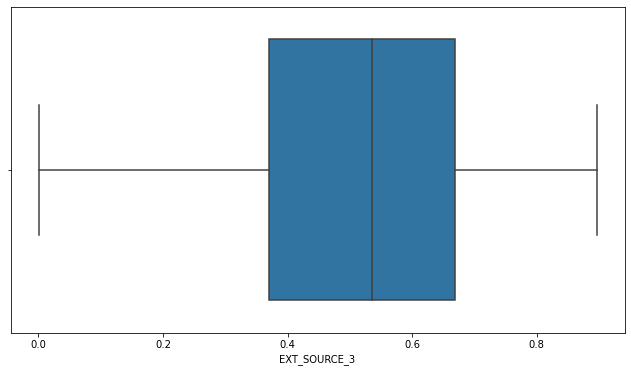

In [18]:
#As EXT_SOURCE_3 is a continous numerical variable, hence we will be checking whether outliers are present as to determine whether to impute mean/median
plt.figure(figsize=[11,6])
sns.boxplot(application_new['EXT_SOURCE_3'])
plt.show()

In [19]:
#as there are no outliers present, we shall impute the missing values with the mean
ext3mean = application_new.EXT_SOURCE_3.mean()

In [20]:
application_new.EXT_SOURCE_3.fillna(ext3mean,inplace=True)

In [21]:
application_new.EXT_SOURCE_3.isnull().sum()

0

### Imputing Values for AMT_REQ_CREDIT_BUREAU_YEAR

In [22]:
application_new.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

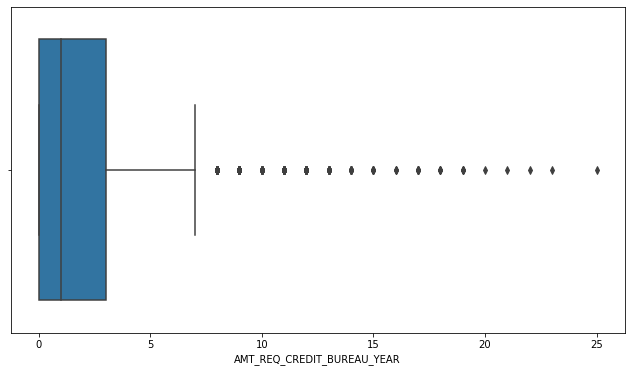

In [23]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_new['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

In [24]:
#Since there are outliers visibly present, it makes sense to use the median value
ymed = application_new.AMT_REQ_CREDIT_BUREAU_YEAR.median()

In [25]:
application_new.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(ymed,inplace=True)

In [26]:
application_new.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

### Imputing values for AMT_REQ_CREDIT_BUREAU_QRT

In [27]:
application_new.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

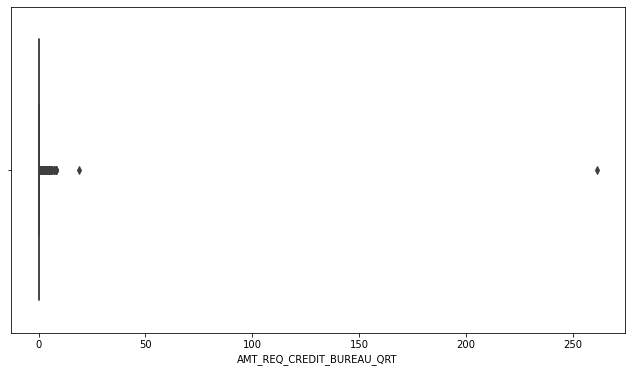

In [28]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_new['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

In [29]:
#Since there are outliers visibly present, it makes sense to use the median value
qrtmed = application_new.AMT_REQ_CREDIT_BUREAU_QRT.median()

In [30]:
application_new.AMT_REQ_CREDIT_BUREAU_QRT.fillna(qrtmed,inplace=True)

In [31]:
application_new.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

### Imputing values for AMT_REQ_CREDIT_BUREAU_MON

In [32]:
application_new.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

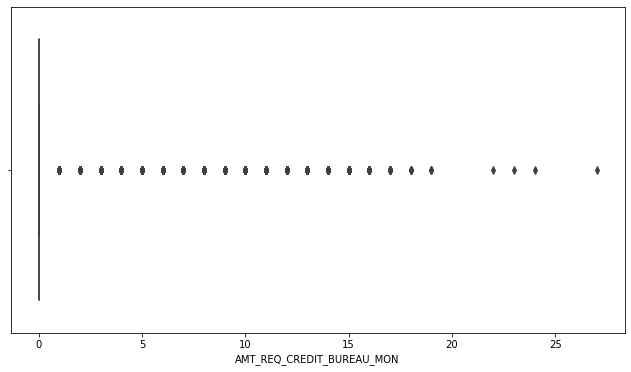

In [33]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_new['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

In [34]:
#Since there are outliers visibly present, it makes sense to use the median value
monmed = application_new.AMT_REQ_CREDIT_BUREAU_MON.median()

In [35]:
application_new.AMT_REQ_CREDIT_BUREAU_MON.fillna(monmed,inplace=True)

In [36]:
application_new.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

### Imputing values for AMT_REQ_CREDIT_BUREAU_WEEK

In [37]:
application_new.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     263752
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

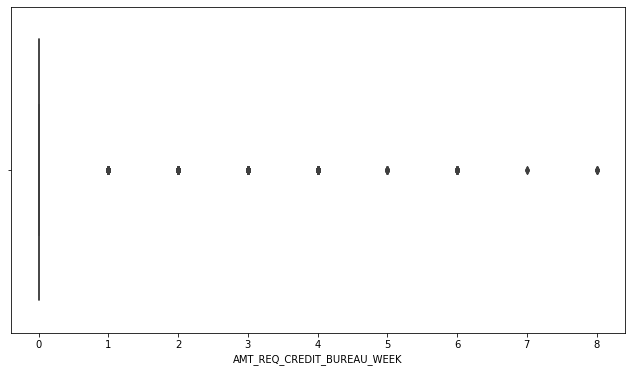

In [38]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_new['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.show()

In [39]:
#Since there are outliers visibly present, it makes sense to use the median value
weekmed = application_new.AMT_REQ_CREDIT_BUREAU_WEEK.median()

In [40]:
application_new.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(weekmed,inplace=True)

In [41]:
application_new.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

### Imputing values for AMT_REQ_CREDIT_BUREAU_DAY

In [42]:
application_new.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

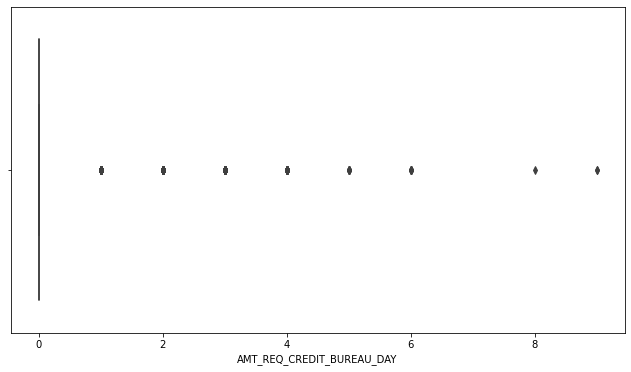

In [43]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_new['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

In [44]:
#Since there are outliers visibly present, it makes sense to use the median value
daymed = application_new.AMT_REQ_CREDIT_BUREAU_DAY.median()

In [45]:
application_new.AMT_REQ_CREDIT_BUREAU_DAY.fillna(daymed,inplace=True)

In [46]:
application_new.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

### Imputing values for AMT_REQ_CREDIT_BUREAU_HOUR

In [47]:
application_new.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

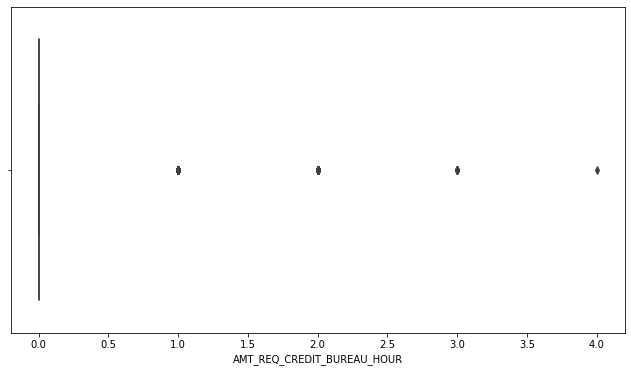

In [48]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_new['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.show()

In [49]:
#Since there are outliers visibly present, it makes sense to use the median value
hourmed = application_new.AMT_REQ_CREDIT_BUREAU_HOUR.median()

In [50]:
application_new.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(hourmed,inplace=True)

In [51]:
application_new.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

### Imputing values for NAME_TYPE_SUITE

In [52]:
application_new.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [53]:
#As Name Type Suite is a categorical variable, standard procedure would be to impute this value with the mode i.e. Unaccompanied
ntsmode = application_new.NAME_TYPE_SUITE.mode()[0]

In [54]:
application_new.NAME_TYPE_SUITE.fillna(ntsmode,inplace=True)

In [55]:
application_new.NAME_TYPE_SUITE.isnull().sum()

0

### Imputing values for OBS_30_CNT_SOCIAL_CIRCLE

In [56]:
application_new.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

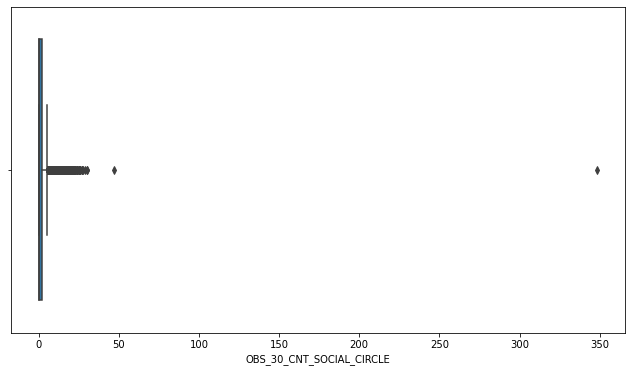

In [57]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_new['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [58]:
#Since there are outliers visibly present, it makes sense to use the median value
obs30med = application_new.OBS_30_CNT_SOCIAL_CIRCLE.median()

In [59]:
application_new.OBS_30_CNT_SOCIAL_CIRCLE.fillna(obs30med,inplace=True)

In [60]:
application_new.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

### Imputing values for DEF_30_CNT_SOCIAL_CIRCLE

In [61]:
application_new.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

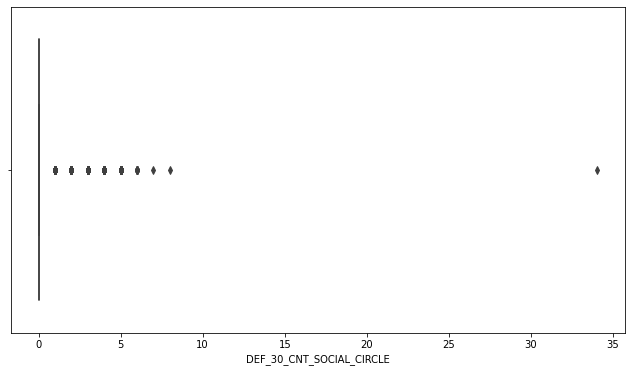

In [62]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_new['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [63]:
#Since there are outliers visibly present, it makes sense to use the median value
def30med = application_new.DEF_30_CNT_SOCIAL_CIRCLE.median()

In [64]:
application_new.DEF_30_CNT_SOCIAL_CIRCLE.fillna(def30med,inplace=True)

In [65]:
application_new.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

### Imputing values for OBS_60_CNT_SOCIAL_CIRCLE

In [66]:
application_new.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
344.0         1
47.0          1
26.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

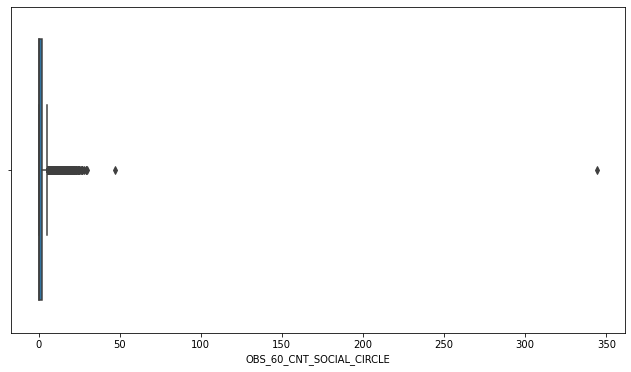

In [67]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_new['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [68]:
#Since there are outliers visibly present, it makes sense to use the median value
obs60med = application_new.OBS_60_CNT_SOCIAL_CIRCLE.median()

In [69]:
application_new.OBS_60_CNT_SOCIAL_CIRCLE.fillna(obs60med,inplace=True)

In [70]:
application_new.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

### Imputing values for DEF_60_CNT_SOCIAL_CIRCLE

In [71]:
application_new.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

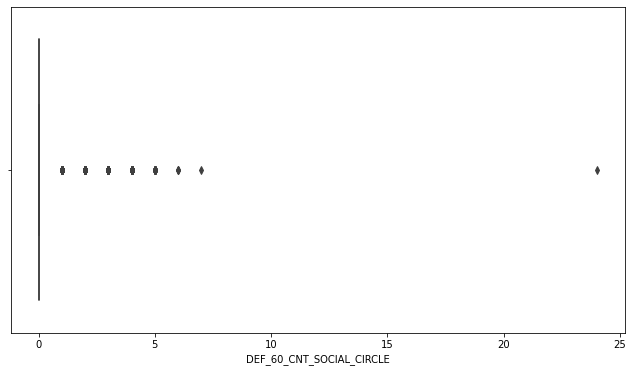

In [72]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_new['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [73]:
#Since there are outliers visibly present, it makes sense to use the median value
def60med = application_new.DEF_60_CNT_SOCIAL_CIRCLE.median()

In [74]:
application_new.DEF_60_CNT_SOCIAL_CIRCLE.fillna(def60med,inplace=True)

In [75]:
application_new.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

### Imputing Values for EXT_SOURCE_2   

In [76]:
application_new.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

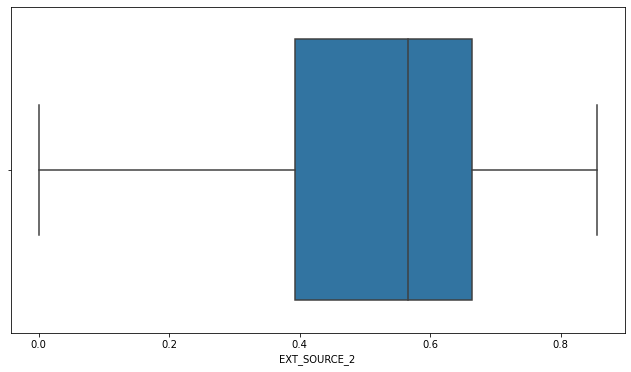

In [77]:
#As EXT_SOURCE_2 is a continous numerical variable, hence we will be checking whether outliers are present as to determine whether to impute mean/median
plt.figure(figsize=[11,6])
sns.boxplot(application_new['EXT_SOURCE_2'])
plt.show()

In [78]:
#as there are no outliers present, we shall impute the missing values with the mean
ext2mean = application_new.EXT_SOURCE_2.mean()

In [79]:
application_new.EXT_SOURCE_2.fillna(ext2mean,inplace=True)

In [80]:
application_new.EXT_SOURCE_2.isnull().sum()

0

### Imputing Values for AMT_GOODS_PRICE

In [81]:
application_new.AMT_GOODS_PRICE.value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

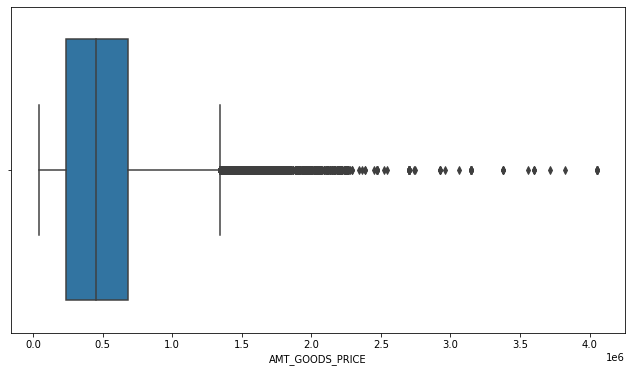

In [82]:
#As AMT_GOODS_PRICE is a continous numerical variable, hence we will be checking whether outliers are present as to determine whether to impute mean/median
plt.figure(figsize=[11,6])
sns.boxplot(application_new['AMT_GOODS_PRICE'])
plt.show()

In [83]:
#Since there are outliers visibly present, it makes sense to use the median value
agpmed = application_new.AMT_GOODS_PRICE.median()

In [84]:
application_new.AMT_GOODS_PRICE.fillna(agpmed,inplace=True)

In [85]:
application_new.AMT_GOODS_PRICE.isnull().sum()

0

### Imputing Values for AMT_ANNUITY

In [86]:
application_new.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

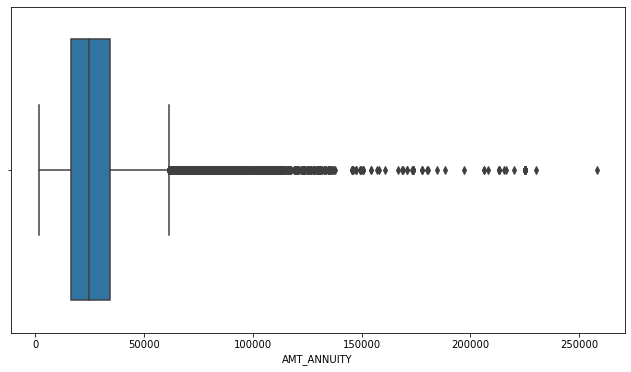

In [87]:
#As AMT_ANNUITY is a continous numerical variable, hence we will be checking whether outliers are present as to determine whether to impute mean/median
plt.figure(figsize=[11,6])
sns.boxplot(application_new['AMT_ANNUITY'])
plt.show()

In [88]:
#Since there are outliers visibly present, it makes sense to use the median value
aamed = application_new.AMT_ANNUITY.median()

In [89]:
application_new.AMT_ANNUITY.fillna(aamed,inplace=True)

In [90]:
application_new.AMT_ANNUITY.isnull().sum()

0

### Imputing Values for CNT_FAM_MEMBERS

In [91]:
application_new.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

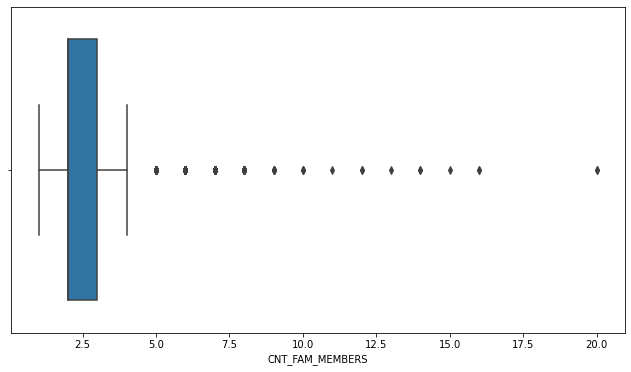

In [92]:
#As CNT_FAME_MEMBERS is a continous numerical variable, hence we will be checking whether outliers are present as to determine whether to impute mean/median
plt.figure(figsize=[11,6])
sns.boxplot(application_new['CNT_FAM_MEMBERS'])
plt.show()

In [93]:
#Since there are outliers visibly present, it makes sense to use the median value
fammed = application_new.CNT_FAM_MEMBERS.median()

In [94]:
application_new.CNT_FAM_MEMBERS.fillna(fammed,inplace=True)

In [95]:
application_new.CNT_FAM_MEMBERS.isnull().sum()

0

### Imputing Values for DAYS_LAST_PHONE_CHANGE

In [96]:
application_new.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-3558.0        1
-3978.0        1
-3701.0        1
-3809.0        1
-3731.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

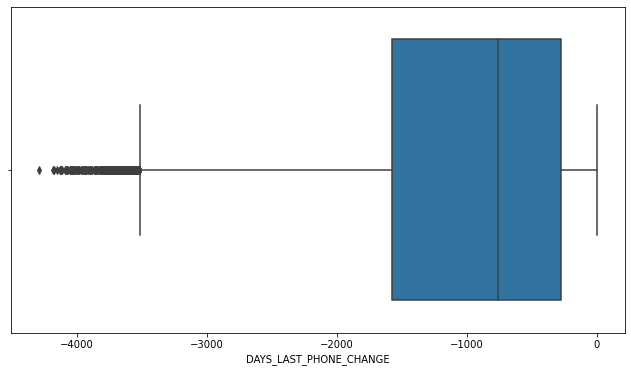

In [97]:
#As this is a numerical value, it makes sense to check for any outliers present to determine value to impute. 
plt.figure(figsize=[11,6])
sns.boxplot(application_new['DAYS_LAST_PHONE_CHANGE'])
plt.show()

In [98]:
#Since there are outliers visibly present, it makes sense to use the median value
daymobmed = application_new.DAYS_LAST_PHONE_CHANGE.median()

In [99]:
application_new.DAYS_LAST_PHONE_CHANGE.fillna(daymobmed,inplace=True)

In [100]:
application_new.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [101]:
#checking dataframe for any missing values
application_new.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

### Correction for data errors & removal of irrelevant columns

In [102]:
application_new.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.417523,0.142944,1.400626,0.099717,-962.858119,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908550e-01,0.174464,2.398395,0.446033,2.377224,0.361735,826.807226,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

In [103]:
#It is visible from data summary that columns related to days for example DAYS_BIRTH etc. have negative values, hence we shall be converting these to absolute figures
application_new['DAYS_BIRTH'] = abs(application_new['DAYS_BIRTH'])
application_new['DAYS_EMPLOYED'] = abs(application_new['DAYS_EMPLOYED'])
application_new['DAYS_REGISTRATION'] = abs(application_new['DAYS_REGISTRATION'])
application_new['DAYS_ID_PUBLISH'] = abs(application_new['DAYS_ID_PUBLISH'])
application_new['DAYS_LAST_PHONE_CHANGE'] = abs(application_new['DAYS_LAST_PHONE_CHANGE'])

In [104]:
application_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##### The Data set has values called XNA i.e. not available in columns CODE_GENDER and ORGANIZATION TYPE, hence we shall be modifying these values accordingly.

In [105]:
application_new.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [106]:
#In this case, there are only 4 XNA values, which means replacing it with mode will not give highly skewed reults.As the mode in CODE_GENDER is for F, we shall be updating XNA values with F respectively 
application_new.CODE_GENDER.replace('XNA',"F",inplace=True)

In [107]:
application_new.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [108]:
application_new.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [109]:
#As there are a total of 55374 XNA values, it might make a big difference and get highly skewed results to modify these with mode, hence, it is better to drop these values as they constitute about 20% of the total amount of rows in dataset
application_new=application_new.drop(application_new.loc[application_new.ORGANIZATION_TYPE=='XNA'].index)

In [110]:
application_new.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

#### There are columns related to document provided such as FLAG_DOCUMENT_2. However, these are irrelevant in the further EDA process as firstly there is no information as to specifically what these documents are and moreover, in standard practice documents are needed as supporting information for the loan application, however may not be the sole criteria for eligibility as there may be several reasons why document was provided or not for eg. document was not in supported format/document was not accessible as customer was travelling etc., and hence these columns are disregarded.

In [111]:
list(application_new.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [112]:
irrelevantcol = ['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [113]:
#Dropping these columns in dataframe, axis is taken as 1 since we are dropping the columns
application_new = application_new.drop(labels = irrelevantcol, axis = 1)

In [114]:
application_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Furthermore, there are columns like 'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'. These columns are also going to be disregarded for the purpose of EDA as their may be several reasons why client has not provided one of these. For eg. a client who is rich, but aged and not tech savvy might not be using an email. Also, there may be some applicants who just have a mobile phone, but not a work/home phone or vice-versa, but this can not be determinant of whether they are eligible for loan or not. Hence, these columns will also be dropped.

In [115]:
irrelevantcol2 = ['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [116]:
#Dropping these columns in dataframe, axis is taken as 1 since we are dropping the columns
application_new = application_new.drop(labels = irrelevantcol2, axis = 1)

In [117]:
application_new.shape

(252137, 47)

In [118]:
application_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


### Binning of Relevant Continous Variables

#### There are 3 variables which we will be binning for better insights from the EDA process. These are namely AMT_INCOME_TOTAL, AMT_CREDIT and DAYS_BIRTH

In [119]:
#Analyzing the quantiles for AMT_INCOME_TOTAL column 
application_new.AMT_INCOME_TOTAL.quantile([0,0.15,0.35,0.7,0.9,1])

0.00        25650.0
0.15        90000.0
0.35       135000.0
0.70       202500.0
0.90       270000.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [120]:
#Converting continous income variable into categorical bins
application_new['Income Group'] = pd.qcut(application_new.AMT_INCOME_TOTAL, q=[0, 0.15, 0.35, 0.7, 0.9, 1], labels=['Low', 'Below Average', "Average", 'Above Average', 'High'])

In [121]:
application_new['Income Group']

0               Average
1         Above Average
2                   Low
3         Below Average
4         Below Average
              ...      
307504          Average
307506          Average
307508          Average
307509          Average
307510          Average
Name: Income Group, Length: 252137, dtype: category
Categories (5, object): [Low < Below Average < Average < Above Average < High]

In [122]:
#Analyzing the quantiles for AMT_CREDIT column 
application_new.AMT_CREDIT.quantile([0,0.15,0.35,0.7,0.9,1])

0.00      45000.0
0.15     225000.0
0.35     367856.1
0.70     757413.0
0.90    1170000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [123]:
#Converting continous Credit Amount into categorical bins
application_new['Credit Group'] = pd.qcut(application_new.AMT_CREDIT, q=[0, 0.15, 0.35, 0.7, 0.9, 1], labels=['Low', 'Below Average', "Average", 'Above Average', 'High'])

In [124]:
application_new['Credit Group']

0               Average
1                  High
2                   Low
3         Below Average
4               Average
              ...      
307504    Below Average
307506    Below Average
307508          Average
307509          Average
307510          Average
Name: Credit Group, Length: 252137, dtype: category
Categories (5, object): [Low < Below Average < Average < Above Average < High]

In [125]:
#As DAYS_BIRTH in column gives the age of person in days, we shall be converting it into years first for better analysis.
application_new['AGE_YEARS'] = application_new.DAYS_BIRTH//365

In [126]:
application_new.AGE_YEARS.describe()

count    252137.000000
mean         39.963155
std          10.033179
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          69.000000
Name: AGE_YEARS, dtype: float64

In [127]:
#Now we will create appropriate bins to create age groups
application_new['AGE_GROUP']=pd.cut(application_new.AGE_YEARS, bins=[18,35,50,70], labels=['Young Adults', 'Middle Aged', 'Seniors'])

In [128]:
#CHecking value counts of different bins
application_new.AGE_GROUP.value_counts()

Middle Aged     115456
Young Adults     91910
Seniors          44771
Name: AGE_GROUP, dtype: int64

In [129]:
#Checking final shape of dataset
application_new.shape

(252137, 51)

In [130]:
application_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income Group,Credit Group,AGE_YEARS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,Average,Average,25,Young Adults
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above Average,High,45,Middle Aged
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,52,Seniors
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,Below Average,Below Average,52,Seniors
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Below Average,Average,54,Seniors


## 3. Inspection, Cleaning and Preparation of Previous Application Dataset

In [131]:
application_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
#inspecting number of rows and columns
application_previous.shape

(1670214, 37)

In [133]:
#inspecting null counts and data types of columns
application_previous.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [134]:
#inspecting descriptive statistics for numeric columns
application_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [135]:
#Checking percentages of missing values across all columns
missingpercent2 = application_previous.isnull().mean()*100

In [136]:

missingpercent2.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [137]:
#Removing columns with more than 35% missing values present
application_previous = application_previous.loc[:,application_previous.isnull().mean()*100<=35]

In [138]:
#inspecting cleaned dataset
application_previous.shape

(1670214, 26)

#### Total of 11 columns have been removed wherein the null values percentage was greater than 35%

In [139]:
#inspecting null value percentages again in order to decide which columns to impute data into
missingpercent2 = application_previous.isnull().mean()*100
missingpercent2.sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_YIELD_GROUP                0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

### Imputing Data for AMT_GOODS_PRICE

In [140]:
application_previous.AMT_GOODS_PRICE.value_counts()

45000.000     47831
225000.000    43549
135000.000    40666
450000.000    38926
90000.000     29367
              ...  
355626.000        1
247404.465        1
355594.500        1
355590.000        1
442350.000        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

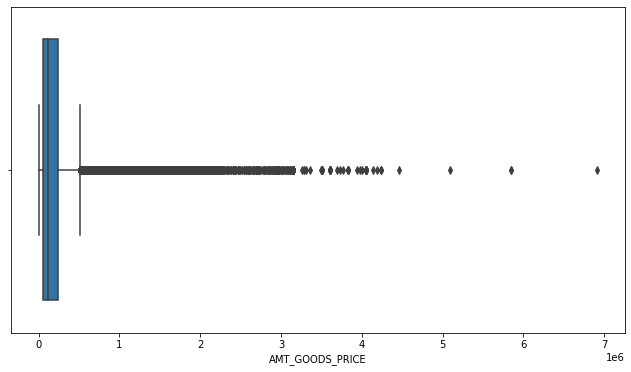

In [141]:
#As this is a continous numerical variable, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_previous['AMT_GOODS_PRICE'])
plt.show()

In [142]:
#Since there are outliers visibly present, it makes sense to use the median value
agpmed = application_previous.AMT_GOODS_PRICE.median()

In [143]:
application_previous.AMT_GOODS_PRICE.fillna(agpmed,inplace=True)

In [144]:
application_previous.AMT_GOODS_PRICE.isnull().sum()

0

### Imputing Data for AMT_ANNUITY

In [145]:
application_previous.AMT_ANNUITY.value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
30073.860        1
41845.365        1
36622.620        1
41864.760        1
63715.905        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

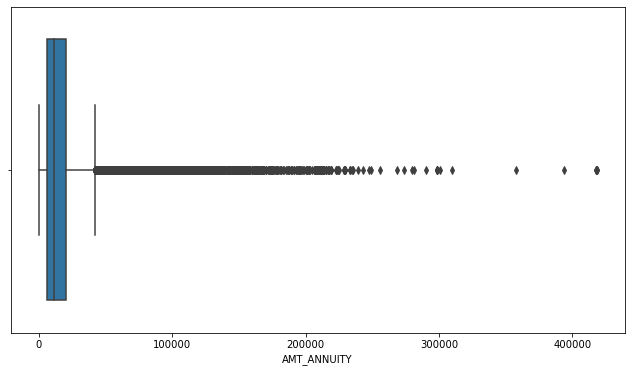

In [146]:
#As this is a continous numerical variable, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_previous['AMT_ANNUITY'])
plt.show()

In [147]:
#Since there are outliers visibly present, it makes sense to use the median value
aamed = application_previous.AMT_ANNUITY.median()

In [148]:
application_previous.AMT_ANNUITY.fillna(aamed,inplace=True)

In [149]:
application_previous.AMT_ANNUITY.isnull().sum()

0

### Imputing Data for CNT_PAYMENT           

In [150]:
application_previous.CNT_PAYMENT.value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
29.0         8
28.0         8
32.0         6
19.0         6
34.0         4
59.0         4
45.0         3
41.0         3
47.0         3
21.0         3
44.0         2
39.0         2
38.0         2
46.0         2
40.0         1
33.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

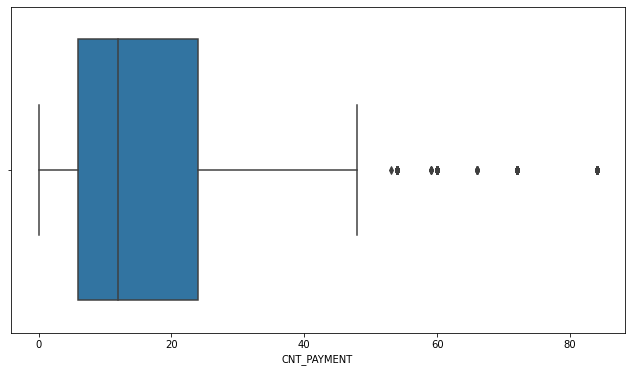

In [151]:
#As this is a continous numerical variable, it makes sense to check for any outliers present to determine value to impute
plt.figure(figsize=[11,6])
sns.boxplot(application_previous['CNT_PAYMENT'])
plt.show()

In [152]:
#Since there are outliers visibly present, it makes sense to use the median value
cpmed = application_previous.CNT_PAYMENT.median()

In [153]:
application_previous.CNT_PAYMENT.fillna(cpmed,inplace=True)

In [154]:
application_previous.CNT_PAYMENT.isnull().sum()

0

### Imputing Data for PRODUCT_COMBINATION           

In [155]:
application_previous.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [156]:
#As Product_Combination is a categorical variable, standard procedure would be to impute this value with the mode i.e. Cash
mo = application_previous.PRODUCT_COMBINATION.mode()[0]

In [157]:
application_previous.PRODUCT_COMBINATION.fillna(mo,inplace=True)

In [158]:
application_previous.PRODUCT_COMBINATION.isnull().sum()

0

### Correction for data errors and removal of irrelevant columns

In [159]:
application_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,2.011815e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.515057e+01
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.808629e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.295220e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,1.000000e+01
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,1.600000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


#### It is visible that DAYS_DECISION and SELLERPLACE_AREA have negative values. We will be taking absolute value of DAYS_DECISION, whereas we'll be dropping the SELLERPLACE_AREA column as it is not quite relevant for further EDA.

In [160]:
#Taking absolute value for DAYS_DECISION Column
application_previous.DAYS_DECISION = abs(application_previous.DAYS_DECISION)

In [161]:
application_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [162]:
irrelevant = ['SELLERPLACE_AREA']

In [163]:
#Dropping these columns in dataframe, axis is taken as 1 since we are dropping the columns
application_previous = application_previous.drop(labels = irrelevant, axis = 1)

In [164]:
application_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,24.0,high,Cash Street: high


#### There are many columns which contain XNA or XAP i.e. not available or not applicable values. We shall be modifying these with NaN values respectively.

In [165]:
#Replacing XNA and XAP values with NaN
application_previous=application_previous.replace('XNA', np.NaN)
application_previous=application_previous.replace('XAP', np.NaN)

In [166]:
# Value counts of Contract Status in previous application
application_previous['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [167]:
application_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,NaN,Approved,73,Cash through the bank,NaN,Repeater,Mobile,POS,NaN,Country-wide,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,NaN,Approved,164,NaN,NaN,Repeater,NaN,Cash,x-sell,Contact center,NaN,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,NaN,Approved,301,Cash through the bank,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,NaN,Approved,512,Cash through the bank,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,NaN,Cash,walk-in,Credit and cash offices,NaN,24.0,high,Cash Street: high


### Checking for imbalance based on TARGET Value


In [168]:
application_new['TARGET'].value_counts(normalize=True)*100


0    91.340025
1     8.659975
Name: TARGET, dtype: float64

In [169]:
application_new.TARGET.value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

#### 0 = Non-Defaulter Values

#### 1= Defaulter Values

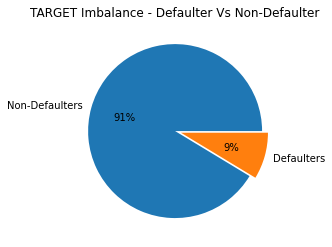

In [170]:
plt.pie(application_new['TARGET'].value_counts(normalize=True)*100,labels=['Non-Defaulters','Defaulters'],autopct='%1.f%%',explode=(0,0.07))
plt.title('TARGET Imbalance - Defaulter Vs Non-Defaulter')
plt.show()

##### -As per above pi chart we can conclude that the imbalance between Defaulter & Non-Defaulter TARGET variables is high 

#### Splitting the dataframe into two separate 'TARGET' Values (Defaulters & Non-Defaulters)


In [171]:
#Dividing the original dataset into two different datasets depending upon the target

Newapplication_0 = application_new[application_new.TARGET==0]              #All the data related to non defaulters
Newapplication_1 = application_new[application_new.TARGET==1]              #All the data related to defaulters

In [172]:
Newapplication_0.shape

(230302, 51)

In [173]:
Newapplication_1.shape

(21835, 51)

In [174]:
#Categorical Columns:

cat_col = list(set(application_new.columns) - set(application_new.describe().columns))
cat_col

['NAME_HOUSING_TYPE',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'Credit Group',
 'Income Group',
 'CODE_GENDER',
 'OCCUPATION_TYPE',
 'AGE_GROUP',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR']

In [175]:
#Numerical Columns:

num_col = application_new.describe().columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_YEARS'],
      dtype='object')

In [176]:
application_categorical = application_new.select_dtypes(include=['object']).columns
application_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

### 4. Univariate Analysis

#### 4.1 Univariate Analysis on New Application Data Set

Univariate Analysis of Categorical Variables

#### Plotting Function
#### Function to plot the univariate Analysis

In [177]:
def plotting(Application, Application0, Application1, column):
    
    App = Application
    Newapplication_0 = Application0
    Newapplication_1 = Application1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    App[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1, textprops={'fontsize': 7})
    plt.title(f'Distribution of Loan for Target Values',fontsize=15,fontweight = 'bold')
    
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = App, ax = ax2)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title(f'Distribution of Loan',fontsize=15, fontweight = 'bold')


    ax3 = plt.subplot(223)
    application_new = pd.DataFrame()
    application_new['0']= ((Newapplication_0[col].value_counts())/len(Newapplication_0))
    application_new['1']= ((Newapplication_1[col].value_counts())/len(Newapplication_1))
    application_new.plot.bar(ax=ax3)
    plt.title(f'Distribution of Loan in terms of percentage',fontsize=15,fontweight = 'bold')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

 Univariate Categorical Ordered Analysis

Plotting  NAME_CONTRACT_TYPE


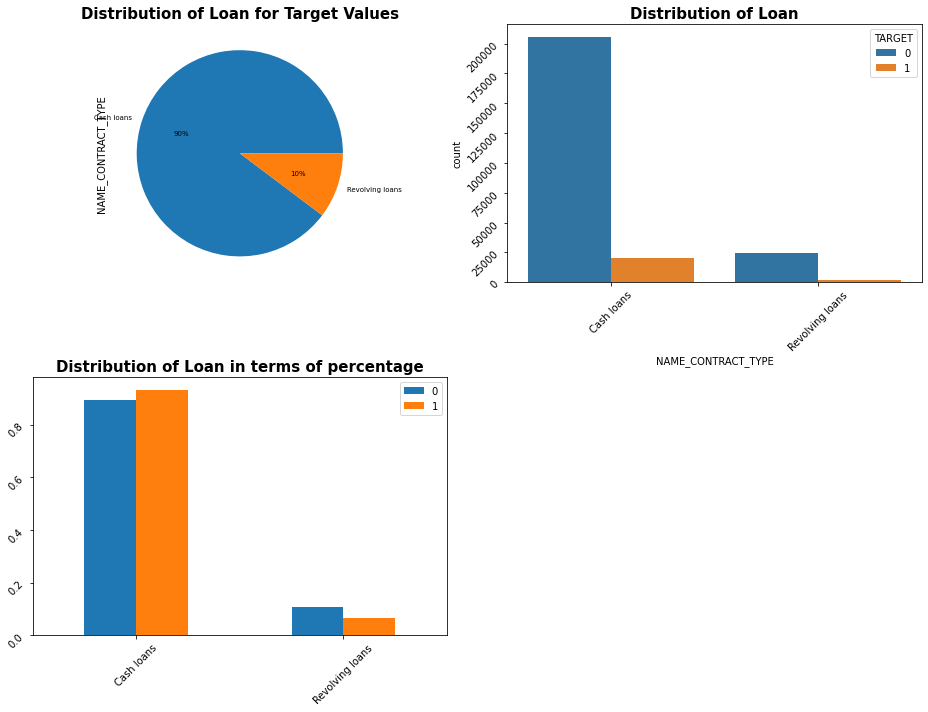



Plotting  CODE_GENDER


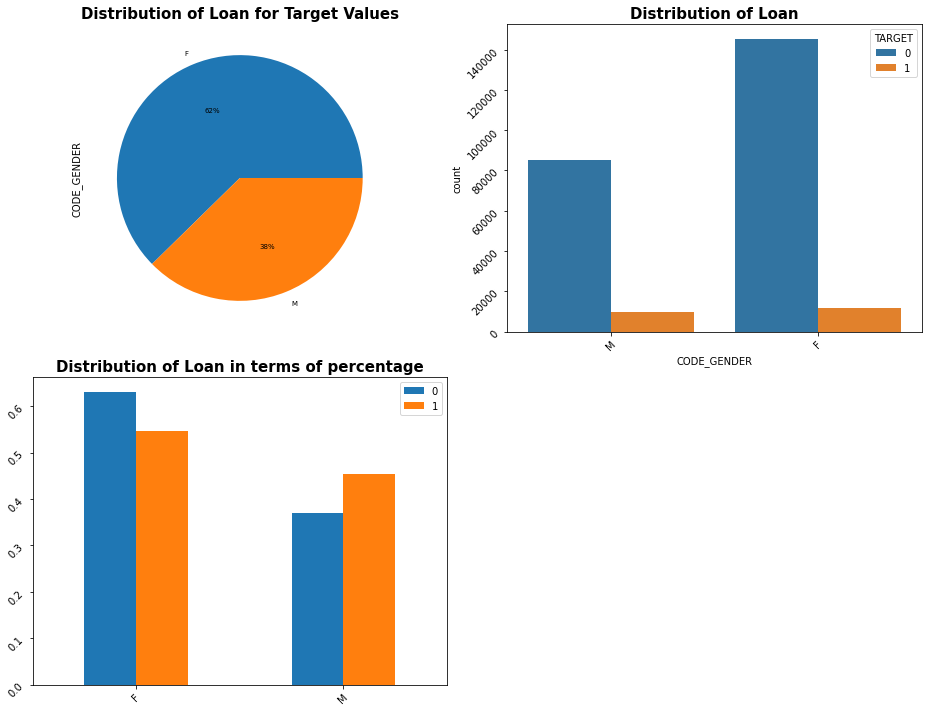



Plotting  FLAG_OWN_CAR


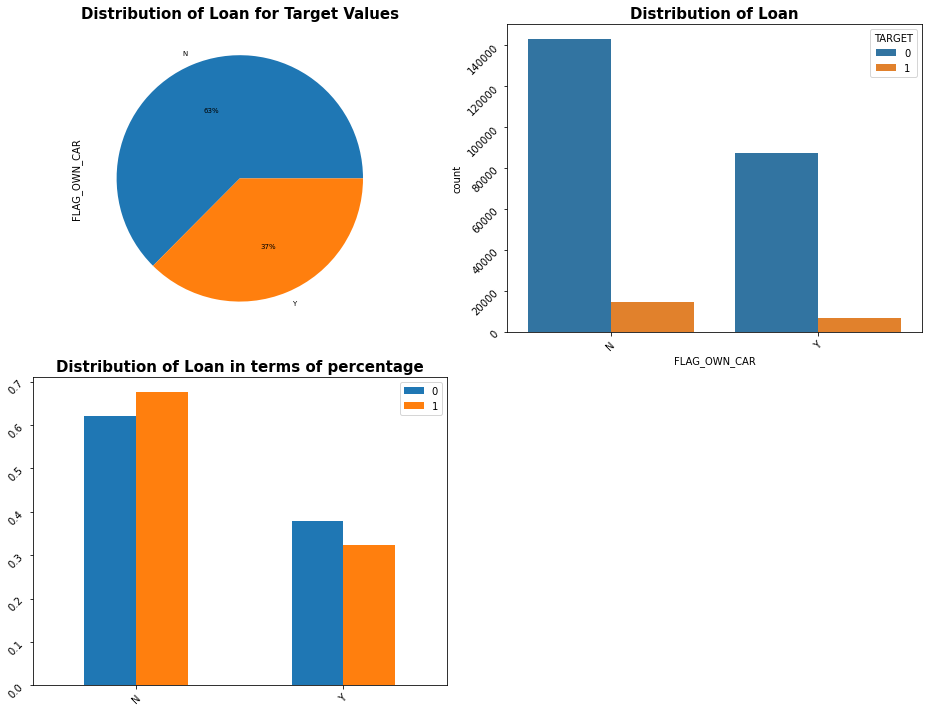



Plotting  FLAG_OWN_REALTY


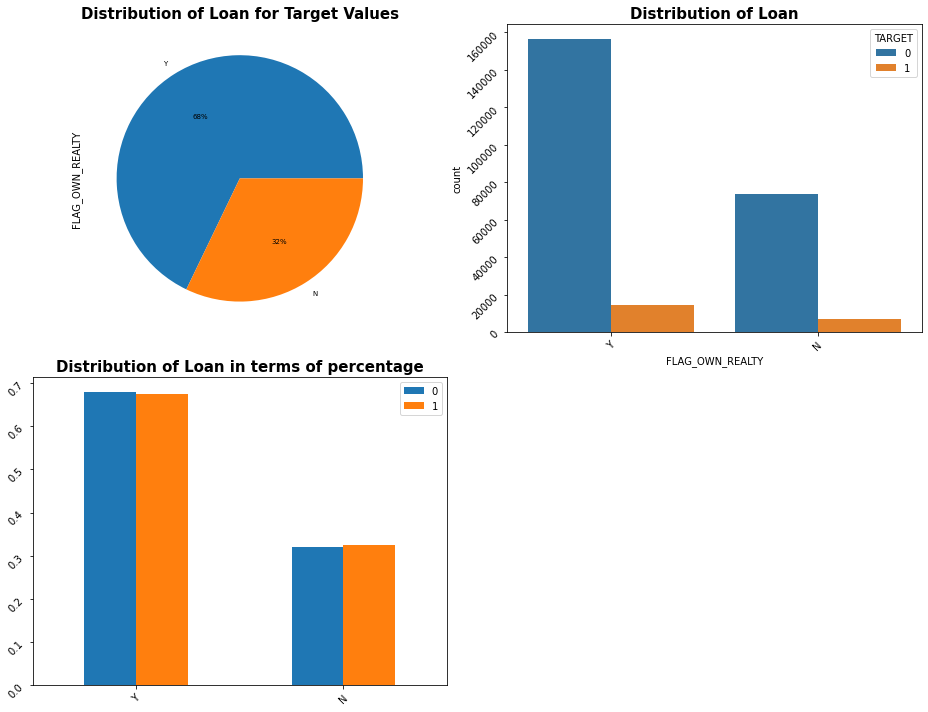



Plotting  NAME_TYPE_SUITE


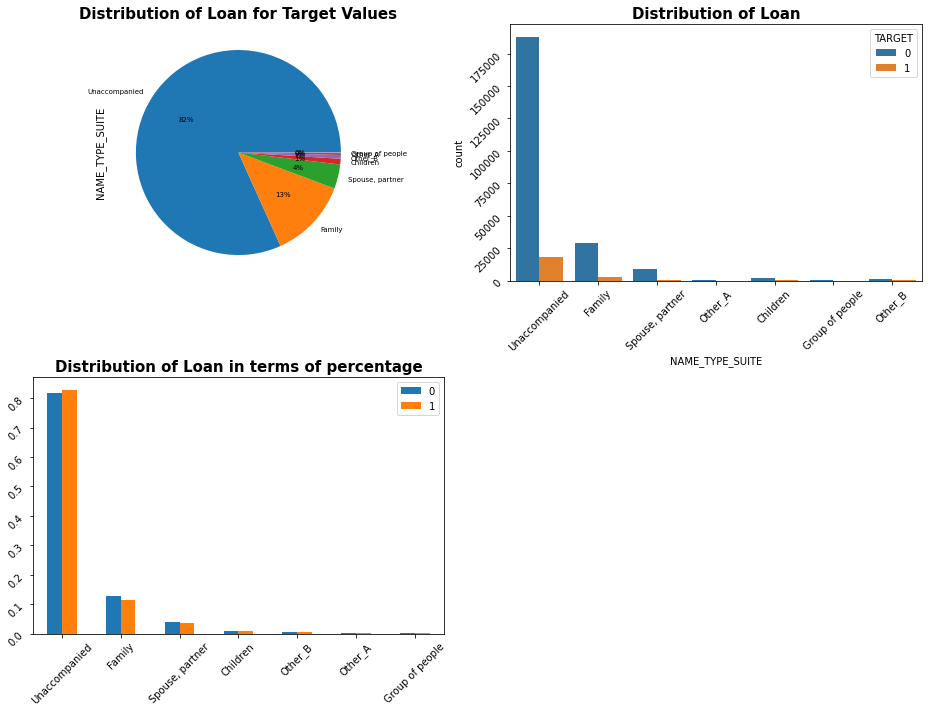



Plotting  NAME_INCOME_TYPE


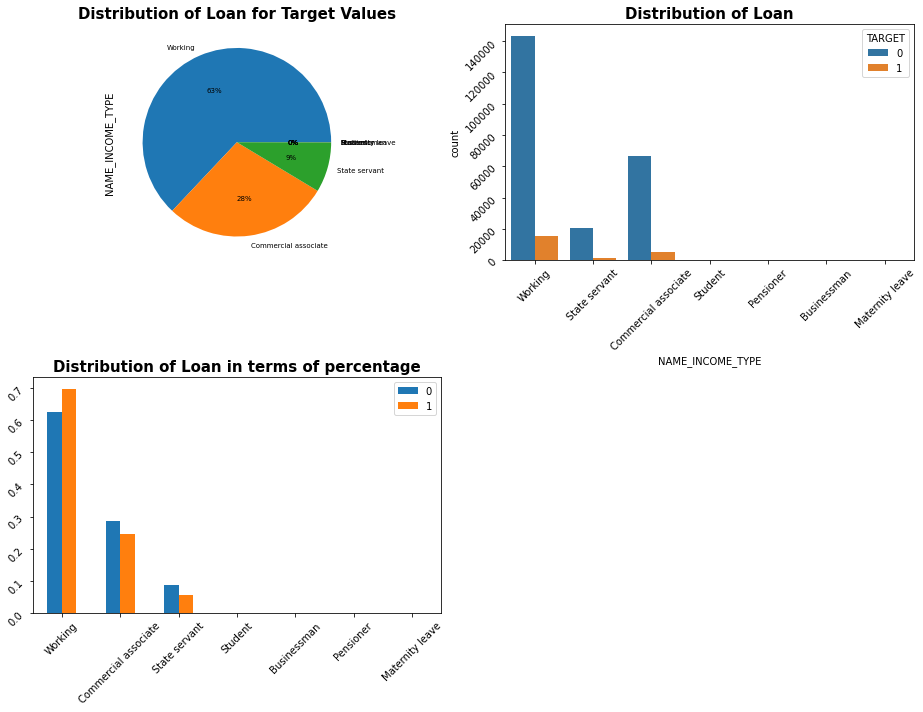



Plotting  NAME_EDUCATION_TYPE


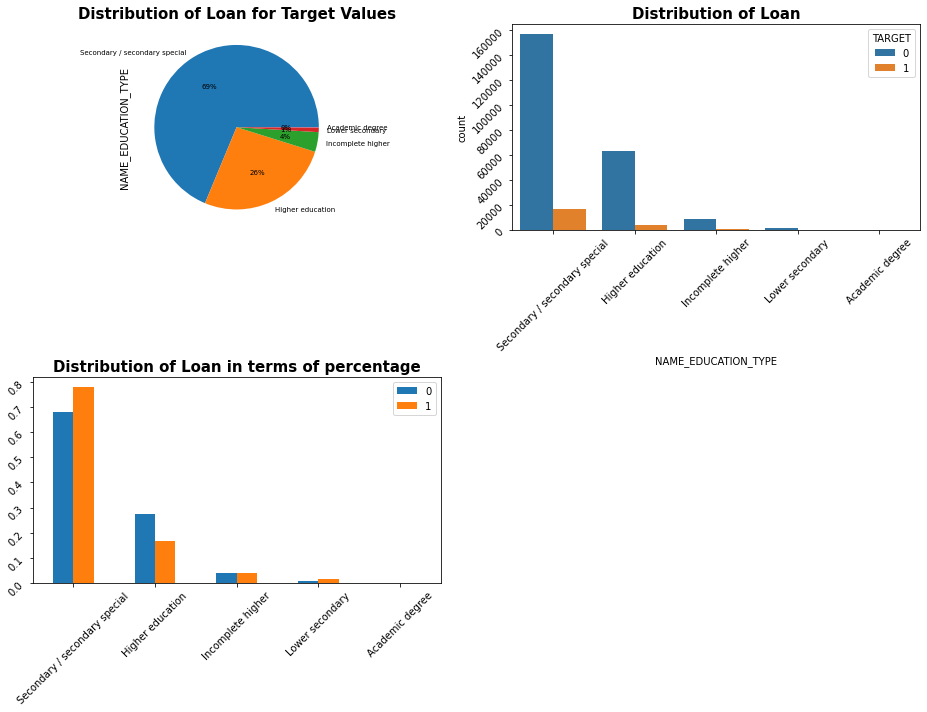



Plotting  NAME_FAMILY_STATUS


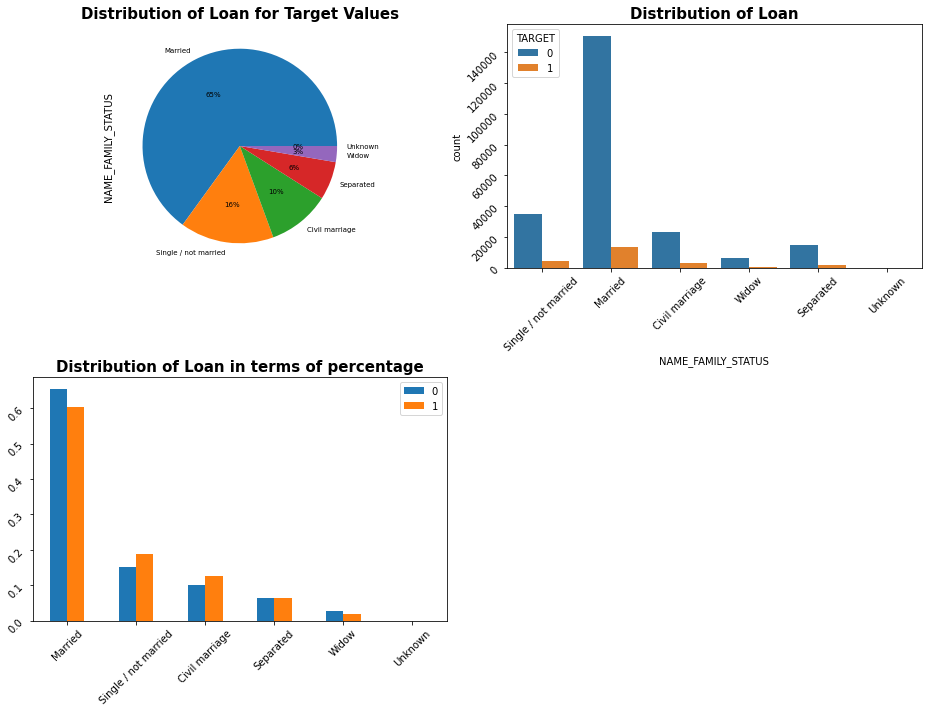



Plotting  NAME_HOUSING_TYPE


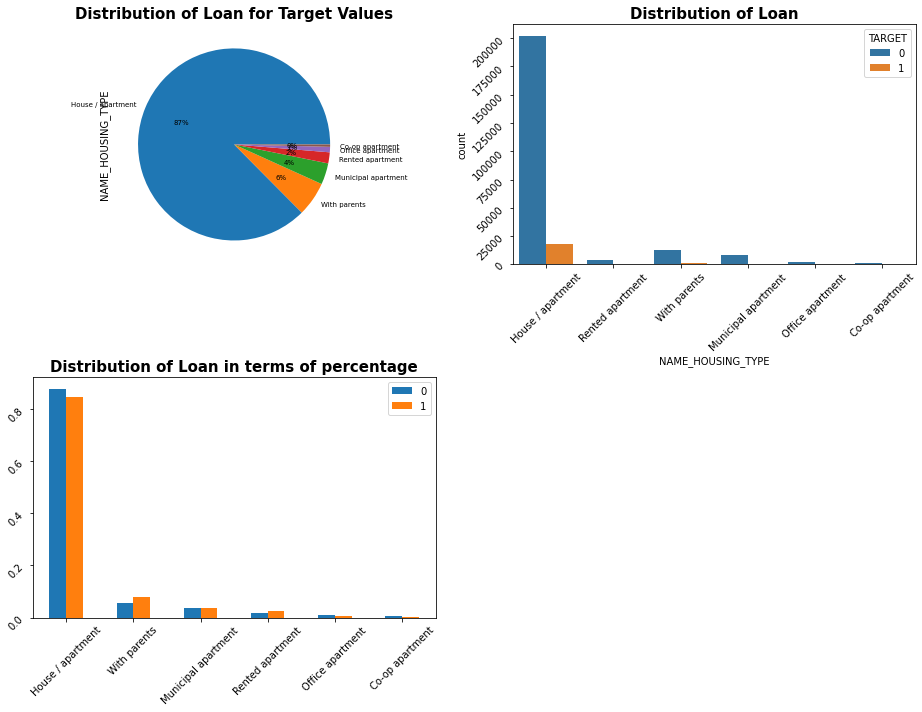



Plotting  OCCUPATION_TYPE


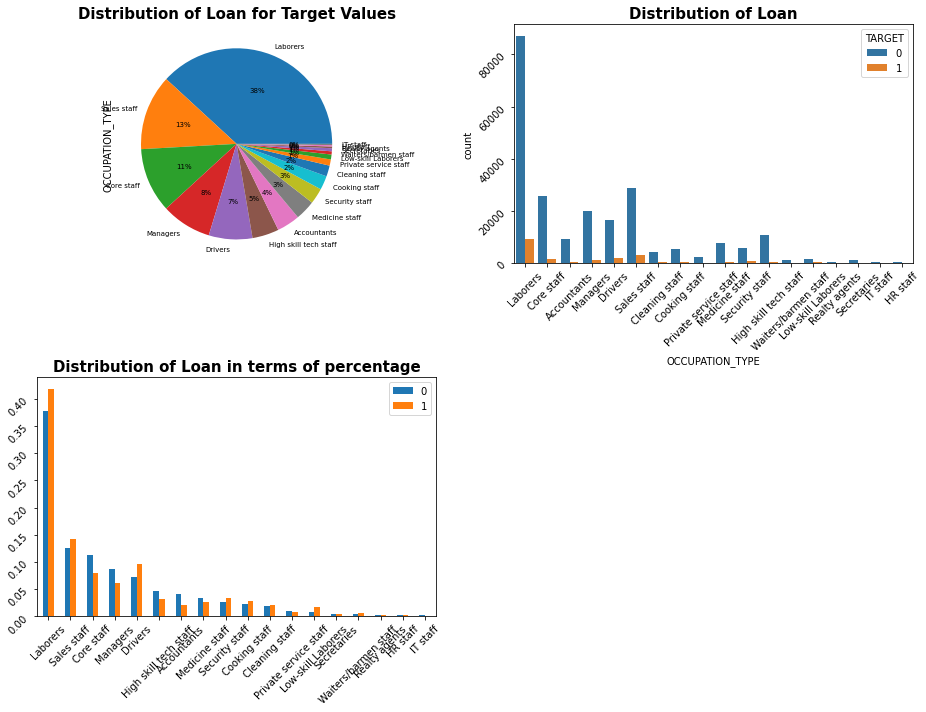



Plotting  WEEKDAY_APPR_PROCESS_START


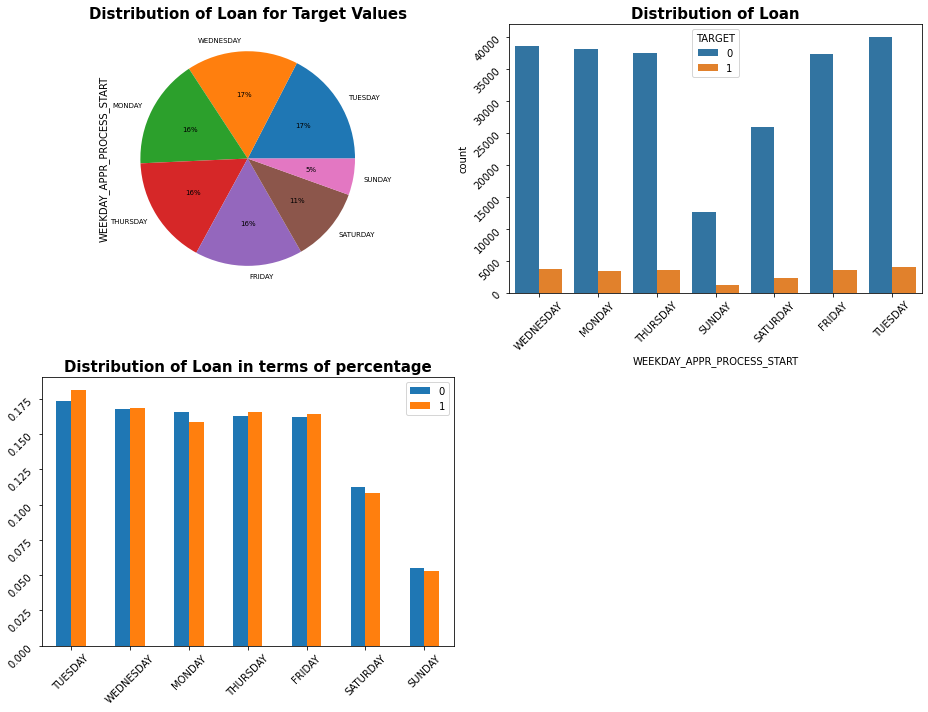



Plotting  ORGANIZATION_TYPE


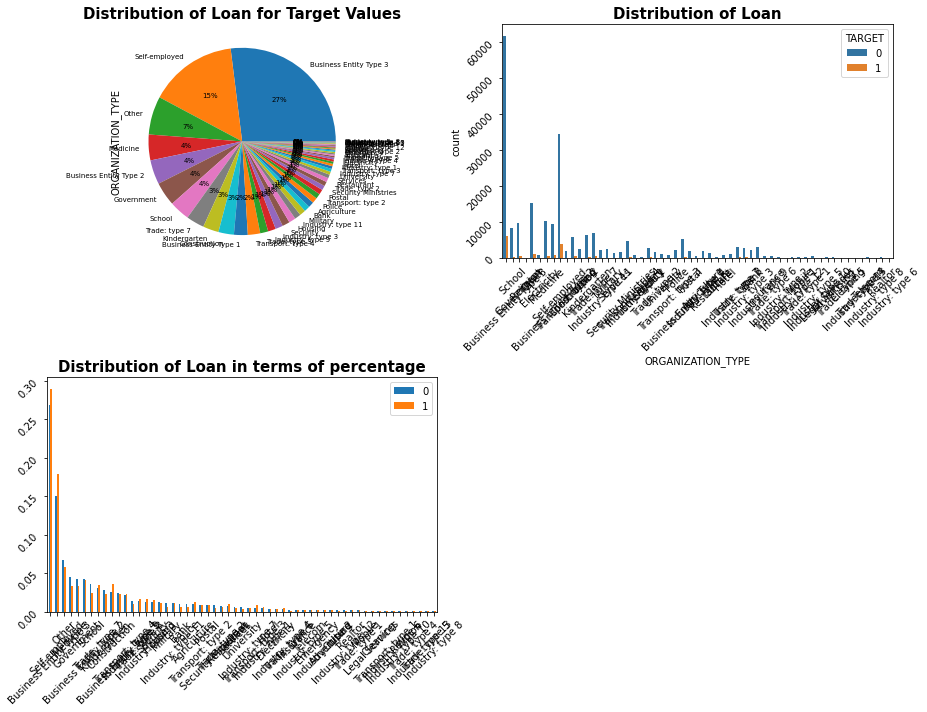

In [178]:
for column in application_categorical:
    print("Plotting ",column)
    plotting(application_new, Newapplication_0, Newapplication_1, column)
    print("\n=======================================================\n")

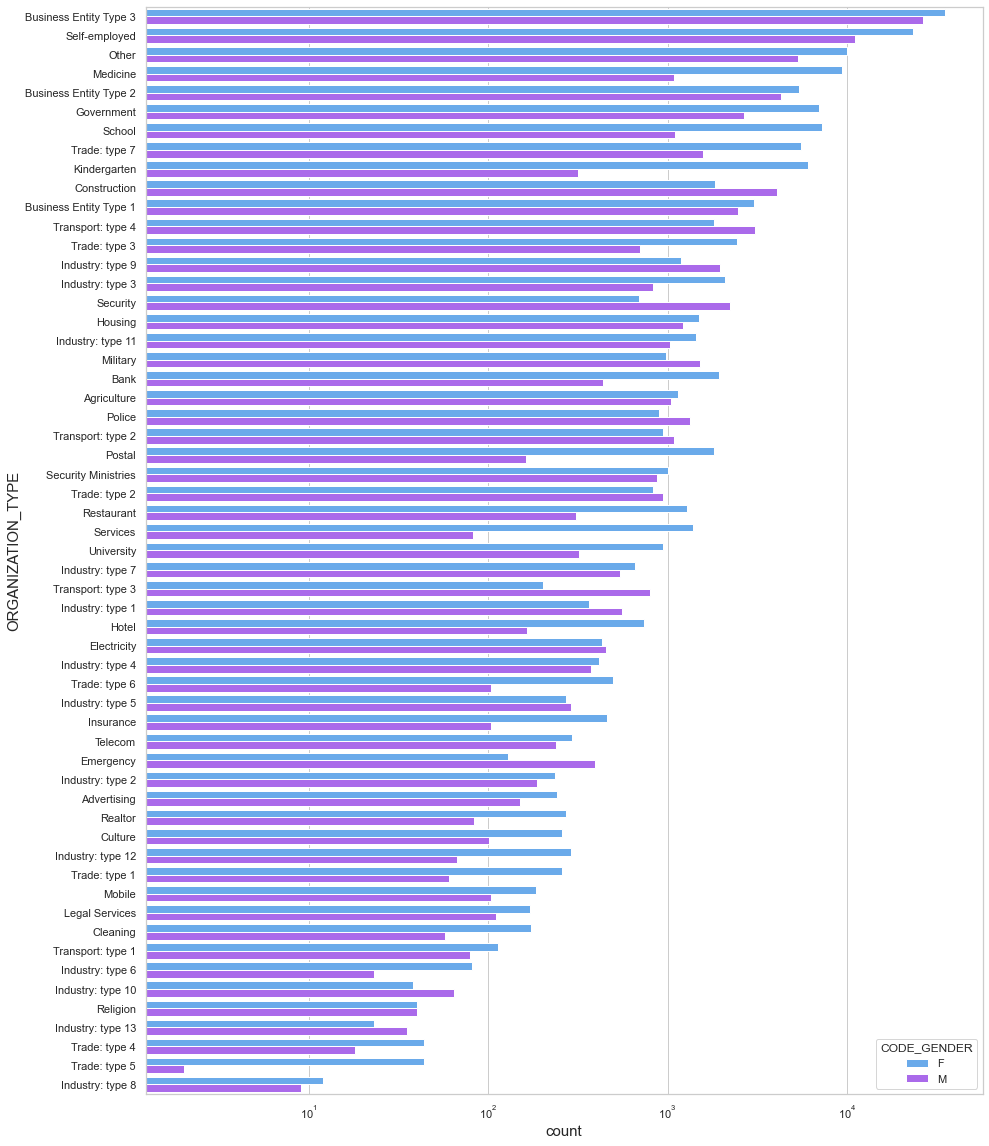

In [219]:
plt.figure(figsize=[15,20])
sns.countplot(data=Newapplication_0,y='ORGANIZATION_TYPE',order=application_new['ORGANIZATION_TYPE'].value_counts().index,hue='CODE_GENDER',palette='cool')
plt.xscale('log')
plt.show()


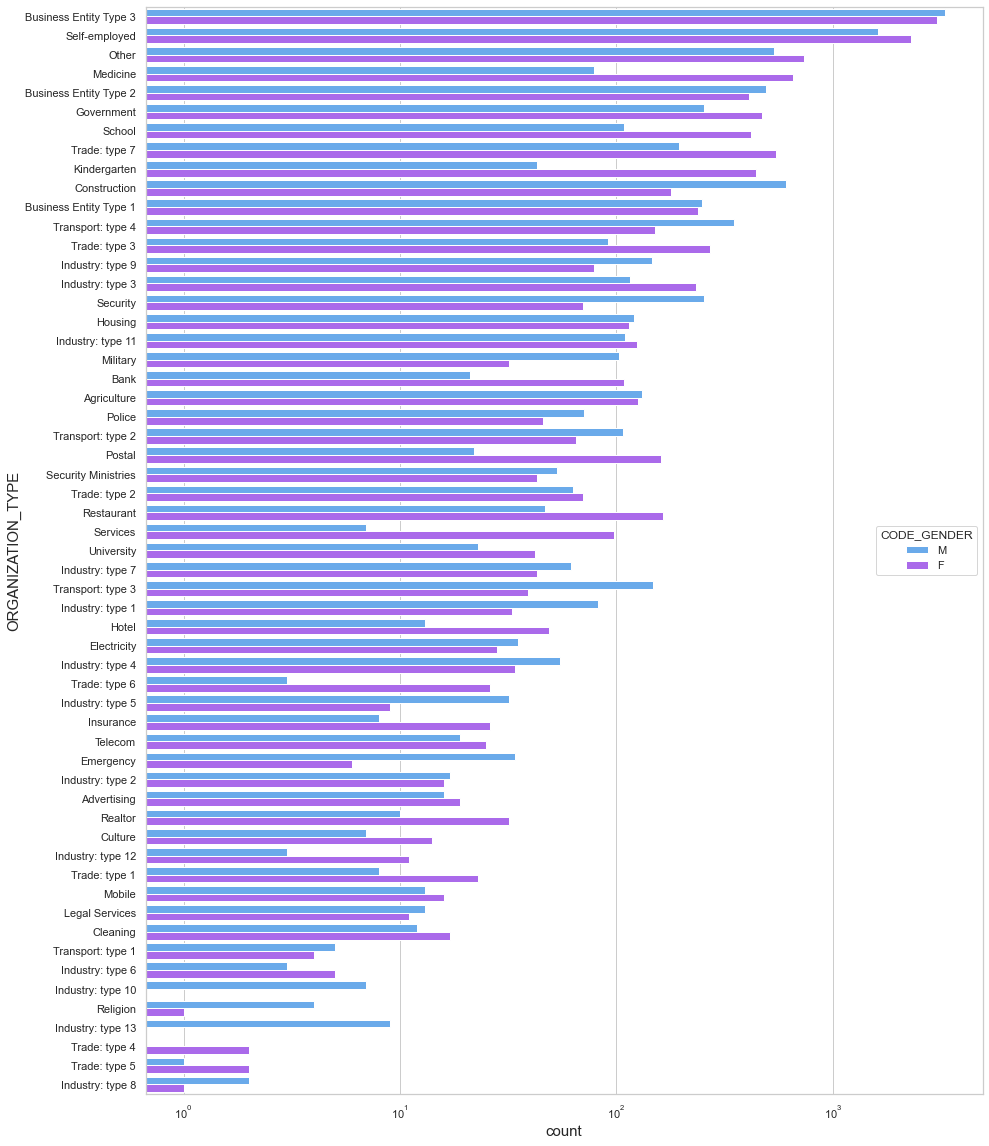

In [218]:
plt.figure(figsize=[15,20])
sns.countplot(data=Newapplication_1,y='ORGANIZATION_TYPE',order=application_new['ORGANIZATION_TYPE'].value_counts().index,hue='CODE_GENDER',palette='cool')
plt.xscale('log')
plt.show()

Observations-

 Gender

#### -Less number of males take loans but the defaulters are higher in case of males.
#### -Comaparing both the plots for Payment Difficulties and Non Payment Difficulties on the basis of Code_Gender, we observe that there is an increase in the percentage in Male Payment Difficulties for Non-Defaulters plot although Females percentage are the majority in both the cases. 



Income Source

#### - We can see that majority of loans are distributed to working class people in both the cases.
#### - As compare to both the cases we can see that the chances of defaulting are more for working people.
#### - We observe a pensioner defaulter is lower than non defaulter.

 Education

#### -Most customers take loan for secondary education followed by higher education. But the default rate in secondary education is much high and for higher education is much low.



Family Status

#### - We can see observe that the Increase in percentage of Civil and Single/not married with Loan-payment difficulties (Defaulters case) as compare to Non-Defaulters Case.
#### - We can see observe that the Decrease in percentage of Married and Widow with Loan-payment difficulties (Defaulters case) as compare to Non-Defaulters Case.

Housing

#### - We observe People living with parents tend to default more often when compared with others.
#### -We observe an increase in the percentage of Payment Difficulties who live with their parents when compared to the percentages of Defaulters and Non-Defaulters cases.
#### -It is clear from the graph that people who have House/Appartment, tend to apply for more loans.


Organization Type

##### - We can observe from Organization Type graph that less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.


#### Univariate continuous variable analysis


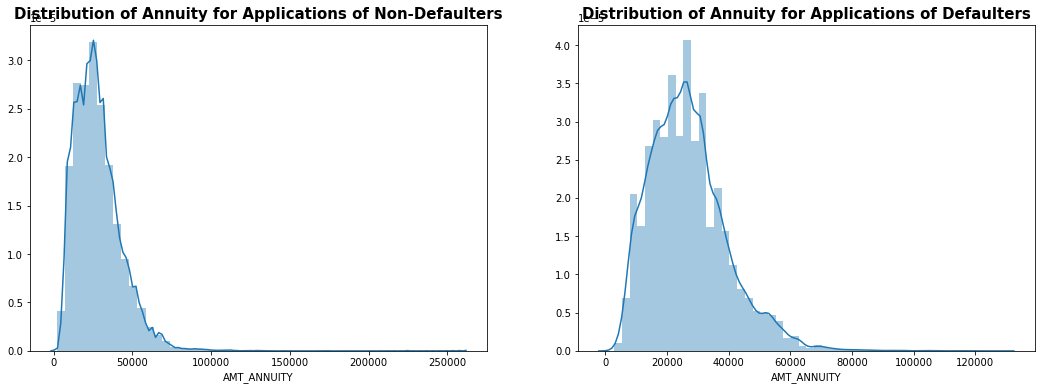

In [180]:
#Distribution of Annuity
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title("Distribution of Annuity for Applications of Non-Defaulters",fontsize=15, fontweight = 'bold')
sns.distplot(Newapplication_0.AMT_ANNUITY)
plt.subplot(1,2,2)
plt.title("Distribution of Annuity for Applications of Defaulters",fontsize=15, fontweight = 'bold')
sns.distplot(Newapplication_1.AMT_ANNUITY)
plt.show()


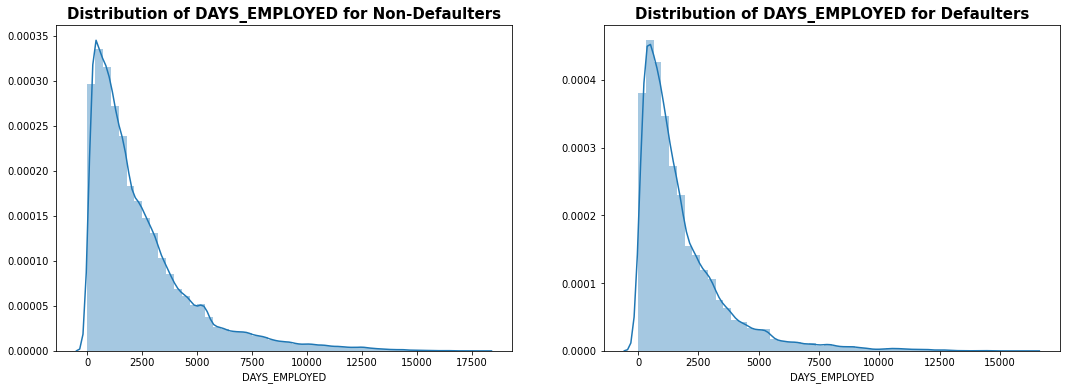

In [181]:
#Distribution of Days_Employed
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title("Distribution of DAYS_EMPLOYED for Non-Defaulters", fontsize=15, fontweight = 'bold')
sns.distplot(Newapplication_0.DAYS_EMPLOYED)
plt.subplot(1,2,2)
plt.title("Distribution of DAYS_EMPLOYED for Defaulters", fontsize=15, fontweight = 'bold')
sns.distplot(Newapplication_1.DAYS_EMPLOYED)
plt.show()

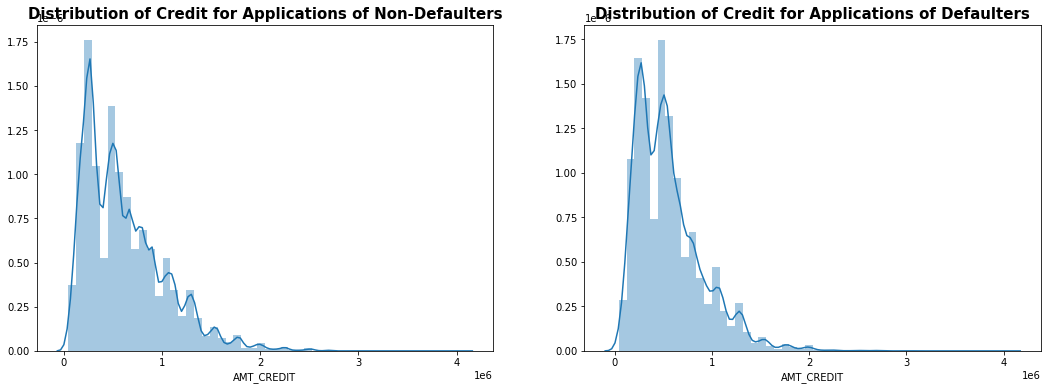

In [182]:
#Ditribution of Credit Amount
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title("Distribution of Credit for Applications of Non-Defaulters", fontsize=15, fontweight = 'bold')
sns.distplot(Newapplication_0.AMT_CREDIT)
plt.subplot(1,2,2)
plt.title("Distribution of Credit for Applications of Defaulters", fontsize=15, fontweight = 'bold')
sns.distplot(Newapplication_1.AMT_CREDIT)
plt.show()

#### -Credit income ratio the ratio of AMT_CREDIT/AMT_INCOME_TOTAL.
#### -When compared using the ratio, we can see that when the CREDIT_INCOME_RATIO is more than 50, people default.  
#### -There doesn't seem to be a clear distiguish between the group which defaulted vs the group which didn't.


#### Univariate Analysis of Numerical Variables on the basis of 'TARGET' Variable

In [183]:
def uni(df,col,hue =None):
    sns.set(style="darkgrid")
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,6))
    ax[0].set_title("Distribution Plot",fontsize=15, fontweight = 'bold')
    sns.distplot(df[~df[col].isna()][col],ax=ax[0], color="violet")
    plt.yscale('log')
    ax[1].set_title("Box Plot",fontsize=15, fontweight = 'bold')
    sns.boxplot(data =df, x=col,ax=ax[1],orient='v', color="violet")
    plt.yscale('log')
    plt.show()


Loan Annuity

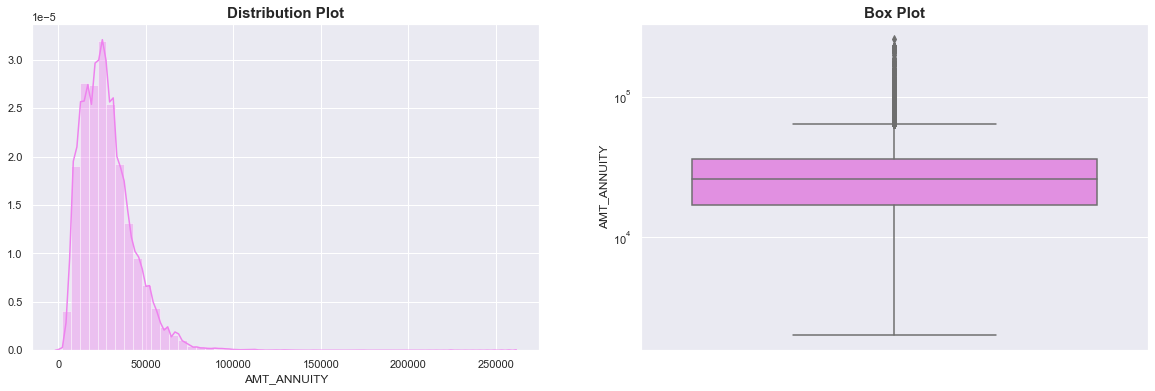

In [184]:
# Distribution and Box plot for 'AMT_ANNUITY' for Non-Defaulters
uni(df=Newapplication_0,col='AMT_ANNUITY')


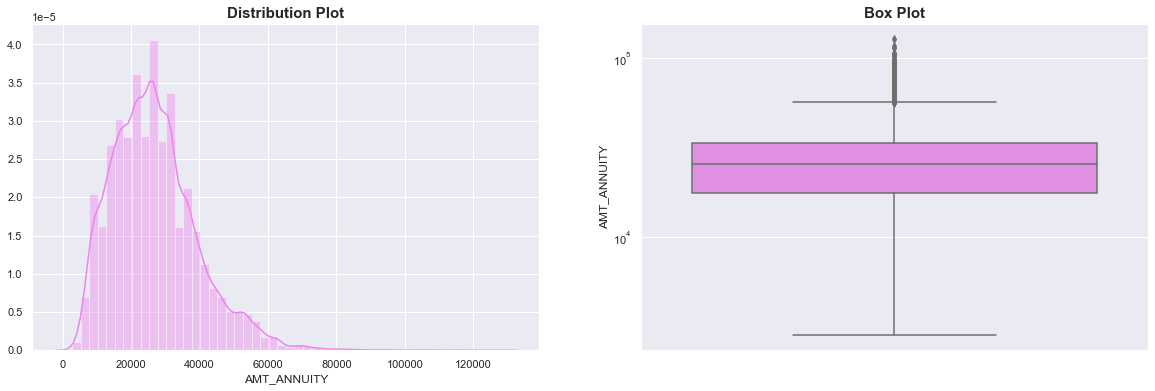

In [185]:
# Distribution and Box plot for 'AMT_ANNUITY' for Defaulters
uni(df=Newapplication_1,col='AMT_ANNUITY')

##### We can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile



Credit Amount

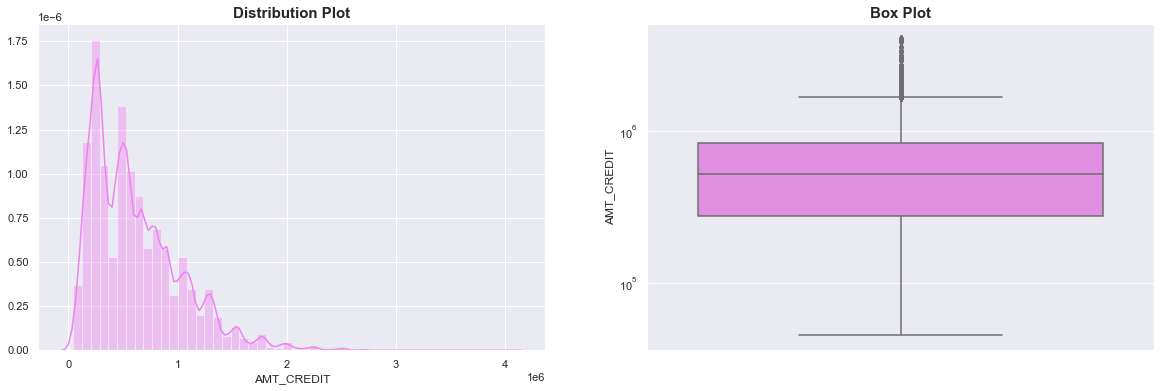

In [186]:
# Distribution and Box plot for 'AMT_CREDIT' for Non-Defaulters
uni(df=Newapplication_0,col='AMT_CREDIT')

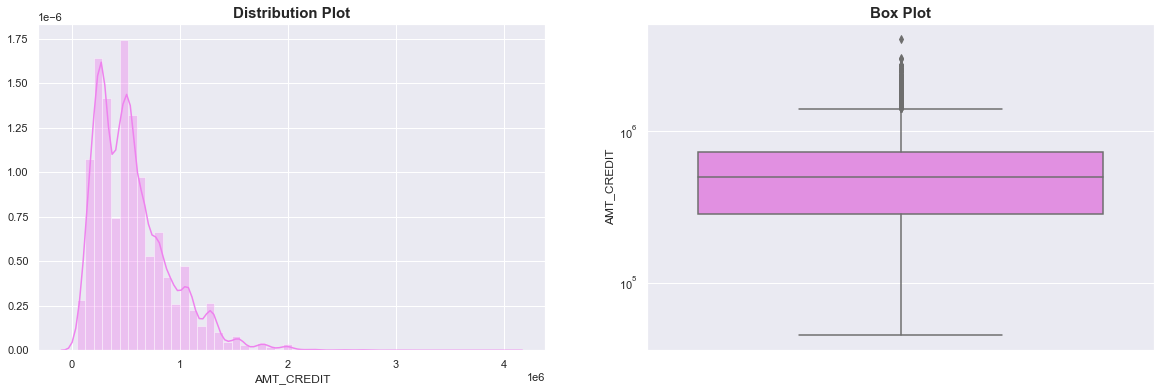

In [187]:
# Distribution and Box plot for 'AMT_CREDIT' for Defaulters
uni(df=Newapplication_1,col='AMT_CREDIT')

#### The distribution curve does not appear to be normal or bell curve.
#### We can observe that some outliers and the first quartile is bigger than third quartile for annuity amount.
#### Most of the annuity clients are from first quartile.

Goods Price


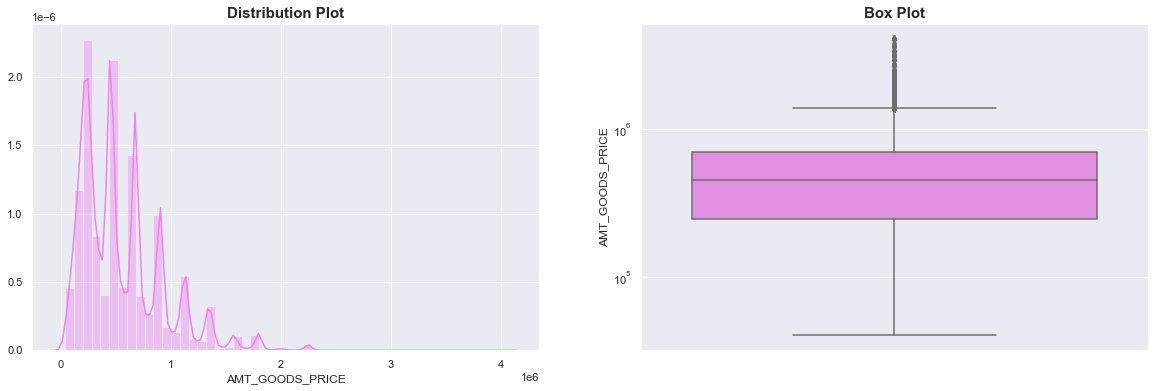

In [188]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Non-Defaulters
uni(df=Newapplication_0,col='AMT_GOODS_PRICE')

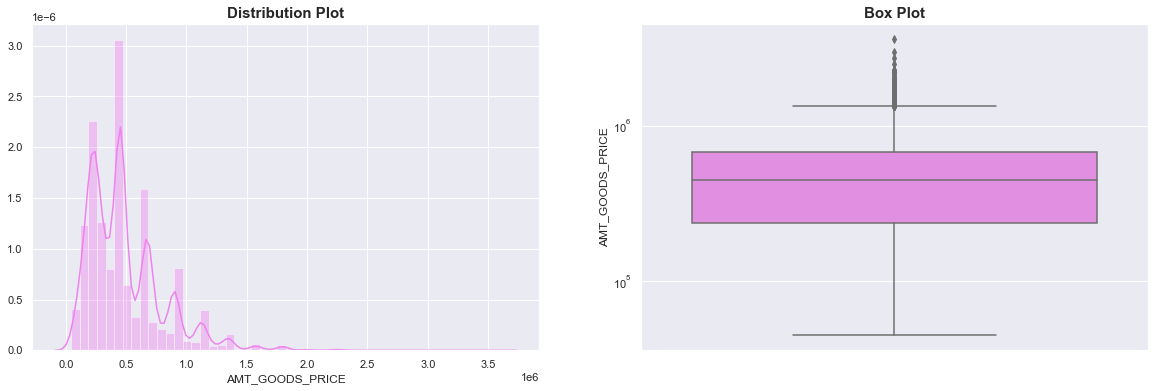

In [189]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Defaulters
uni(df=Newapplication_1,col='AMT_GOODS_PRICE')

#### We can observe some outliers and the first quartile is bigger than third quartile for annuity amount .
#### Most of the annuity clients are from first quartile.



#### 4.2 Bivariate Analysis

Analysing correlation for numerical columns for both Newapplication_0 and Newapplication_1



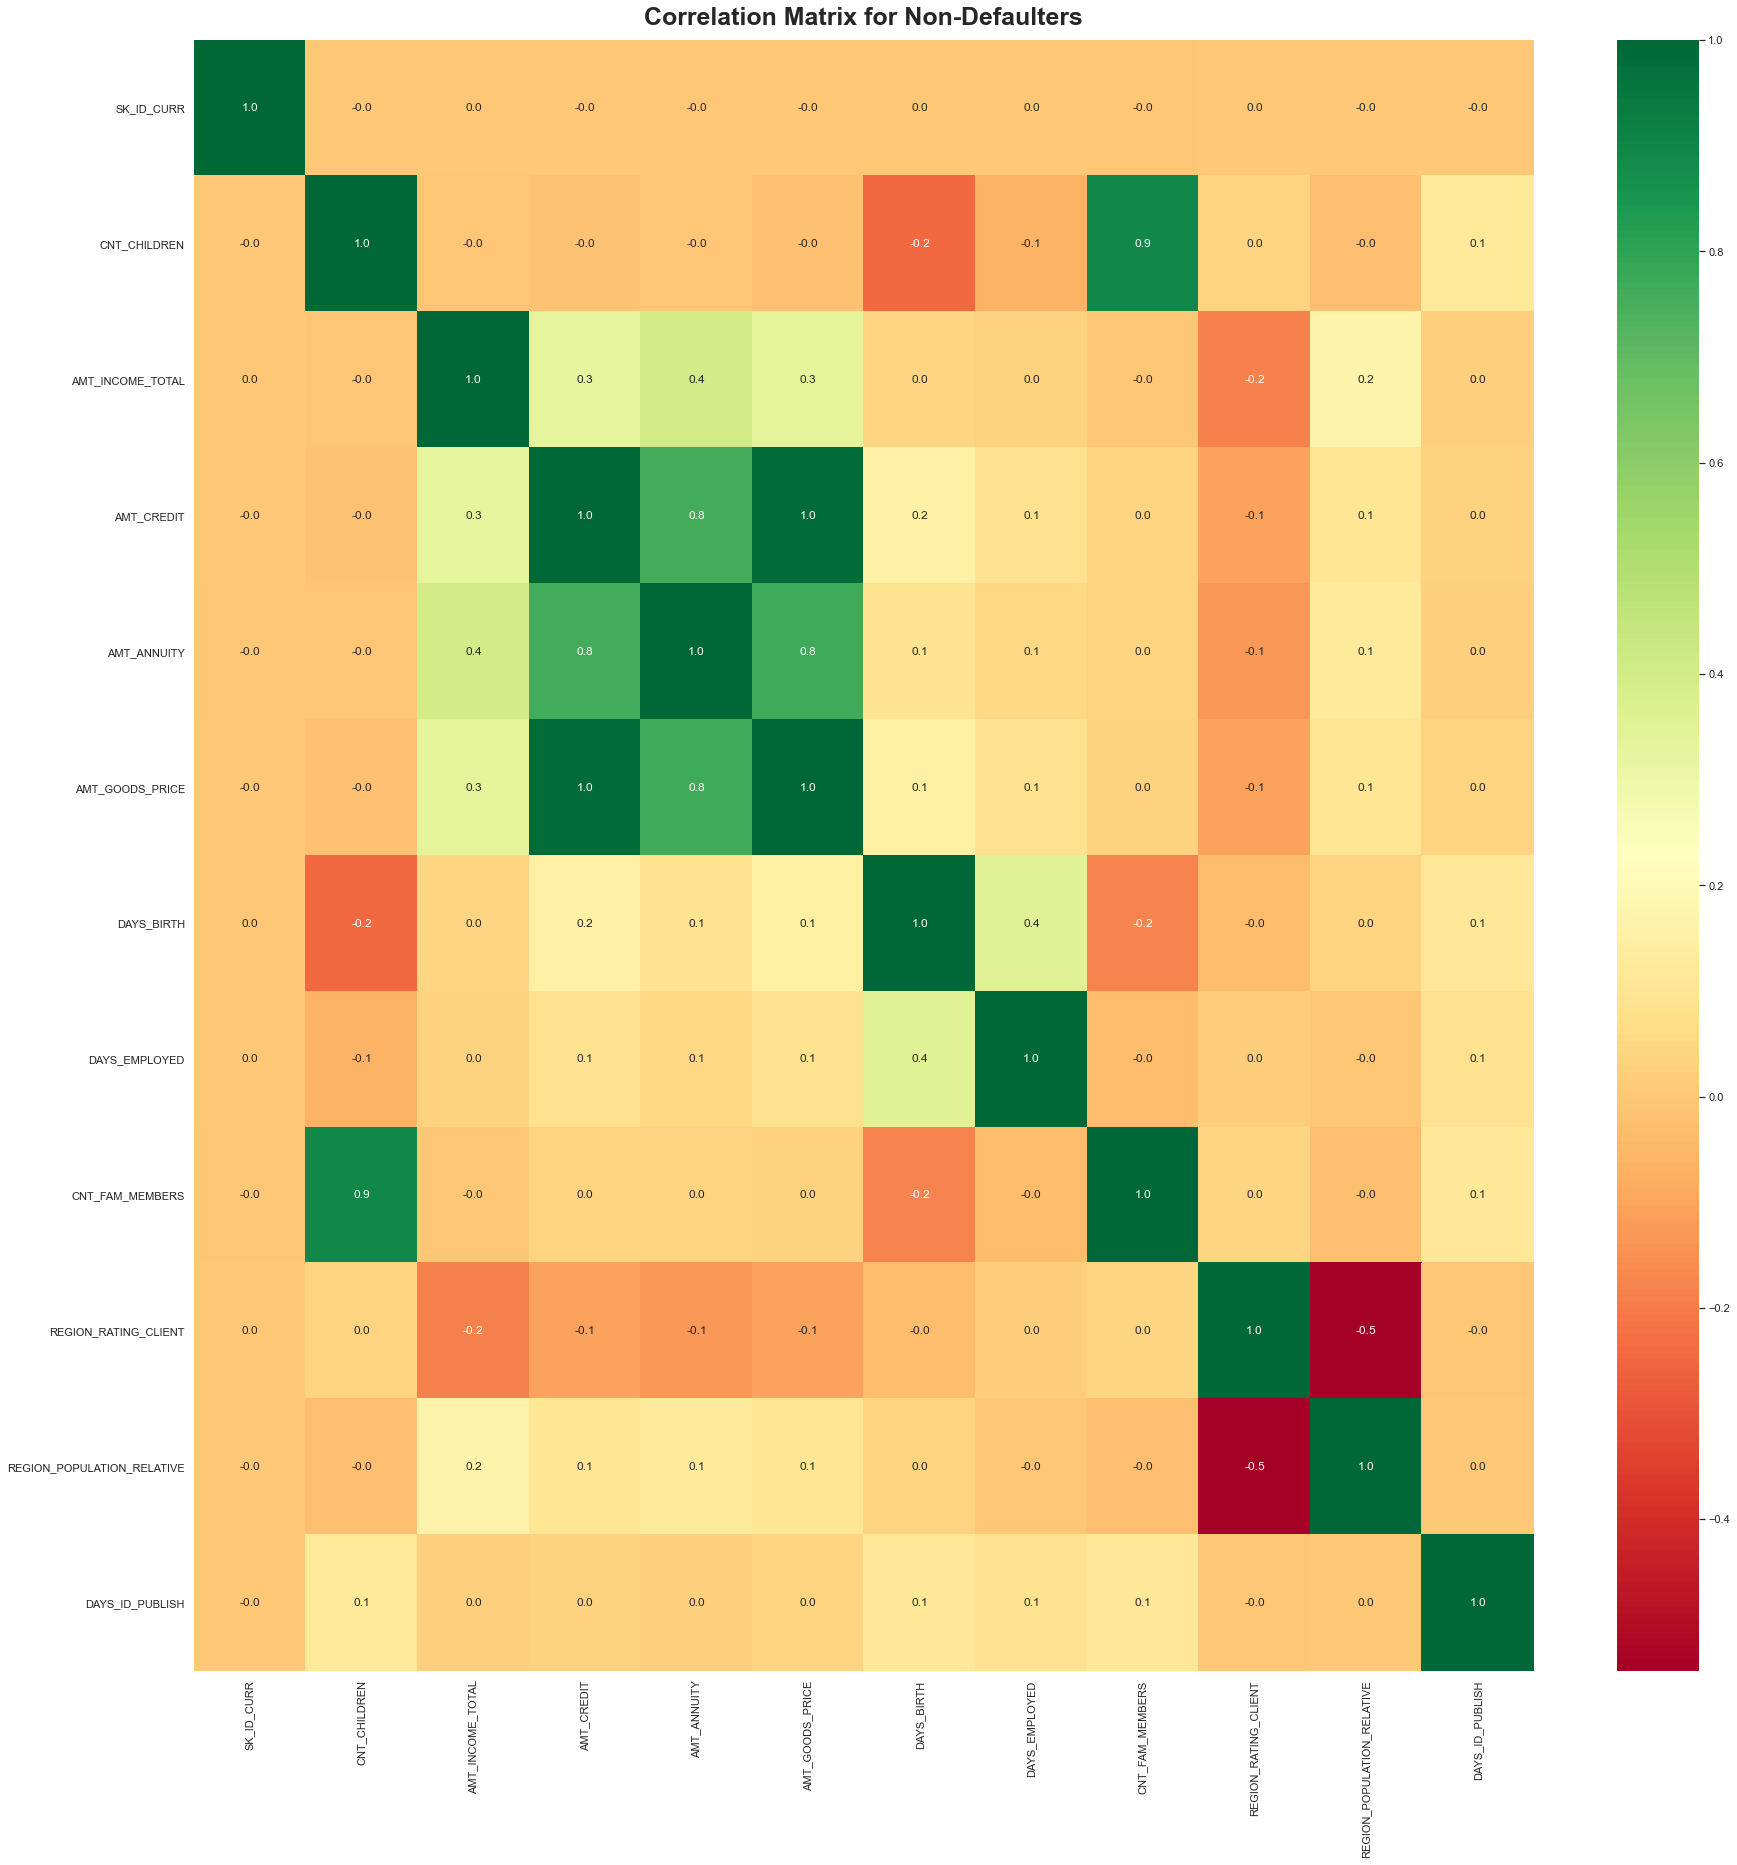

In [190]:
#for Newapplication_0 application data
d=Newapplication_0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(30,30))
sns.heatmap(d.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.title("Correlation Matrix for Non-Defaulters",fontsize=25, pad=15, fontweight = 'bold')
plt.show()


###### We can conclude that:
###### These columns have high correlation values for Newapplication_0 

-AMT_GOODS_PRICE and AMT_CREDIT

-AMT_ANNUITY and AMT_CREDIT

-AMT_ANNUITY and AMT_GOODS_PRICE

-CNT_FAM_MEMBERS and CNT_CHILDREN

-AMT_ANNUITY and AMT_INCOME_TOTAL

-AMT_INCOME_TOTAL and AMT_GOODS_PRICE

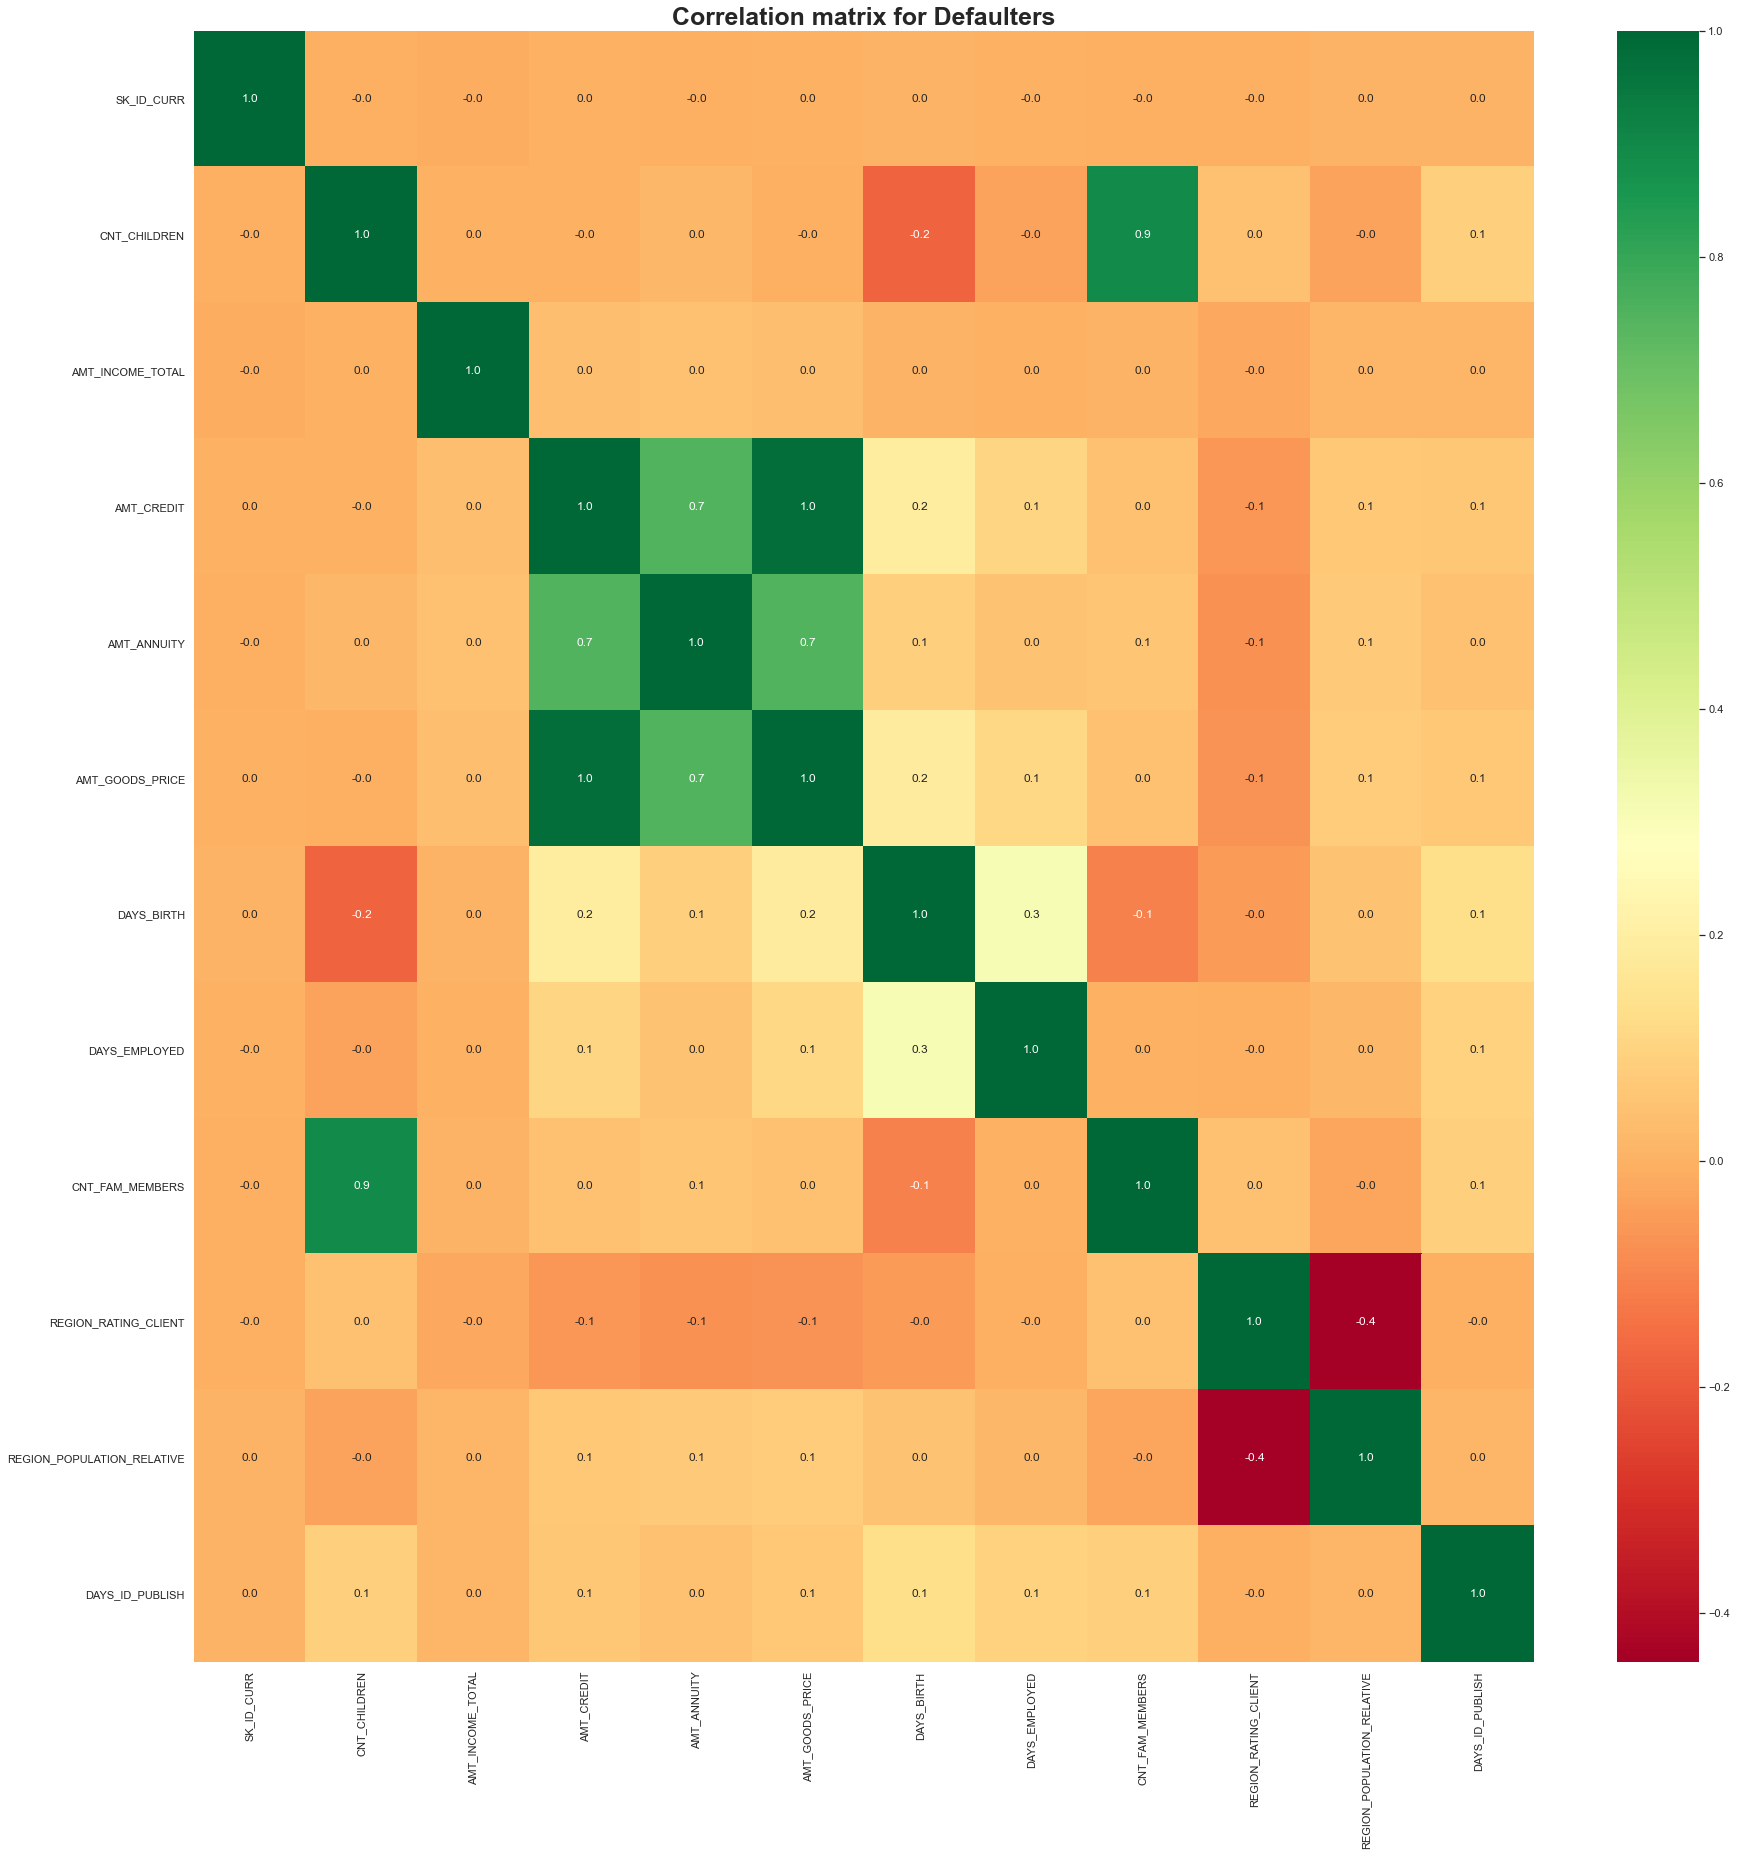

In [191]:
#For Newapplication_1 application data
d=Newapplication_1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(30,30))
sns.heatmap(d.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.title("Correlation matrix for Defaulters",fontsize=25, fontweight = 'bold')
plt.show()


**Inference:
**Both for Newapplication_0 and Newapplication_1 these columns have high correlation values.

AMT_GOODS_PRICE and AMT_CREDIT

AMT_ANNUITY and AMT_CREDIT

AMT_ANNUITY and AMT_GOODS_PRICE

CNT_FAM_MEMBER and CNT_CHILDREN

AMT_ANNUITY and AMT_INCOME_TOTAL

AMT_INCOME_TOTAL and AMT_GOODS_PRICE



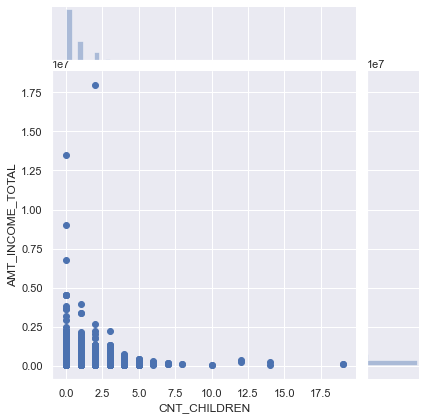

In [192]:
#ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Newapplication_0
sns.jointplot('CNT_CHILDREN', 'AMT_INCOME_TOTAL', Newapplication_0)
plt.show()


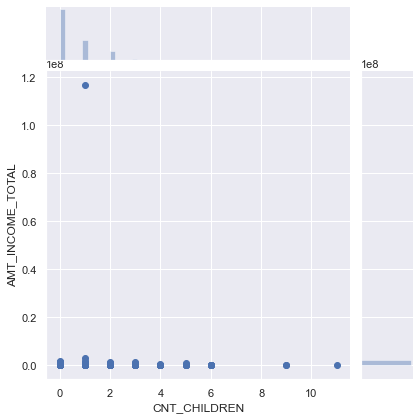

In [193]:
#ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Newapplication_1 
sns.jointplot('CNT_CHILDREN', 'AMT_INCOME_TOTAL', Newapplication_1)
plt.show()


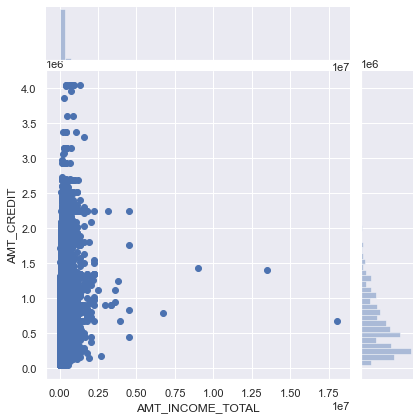

In [194]:
#ploting income vs credit for Newapplication_0
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', Newapplication_0)
plt.show()

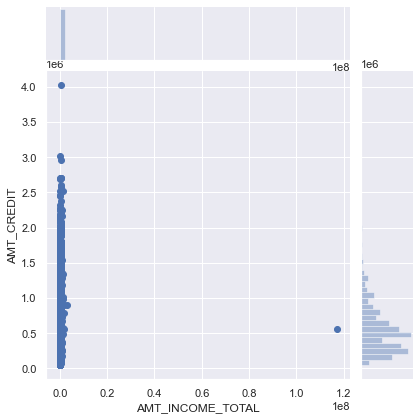

In [195]:
#ploting income vs credit for Newapplication_1 
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', Newapplication_1)
plt.show()

#####  Bivariate Analysis of Numerical vs Numerical Variables



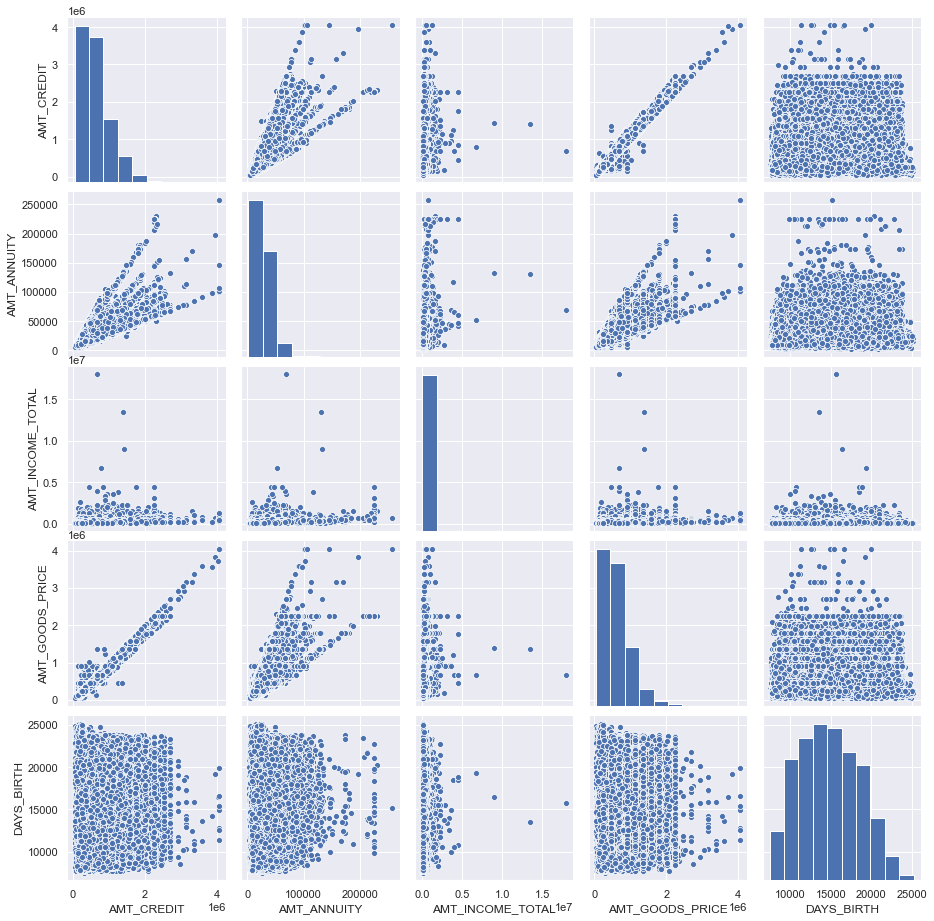

In [196]:
#Pairplot for Newapplication_0 (Loan-Non Payment Difficulties)

pair = Newapplication_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()    


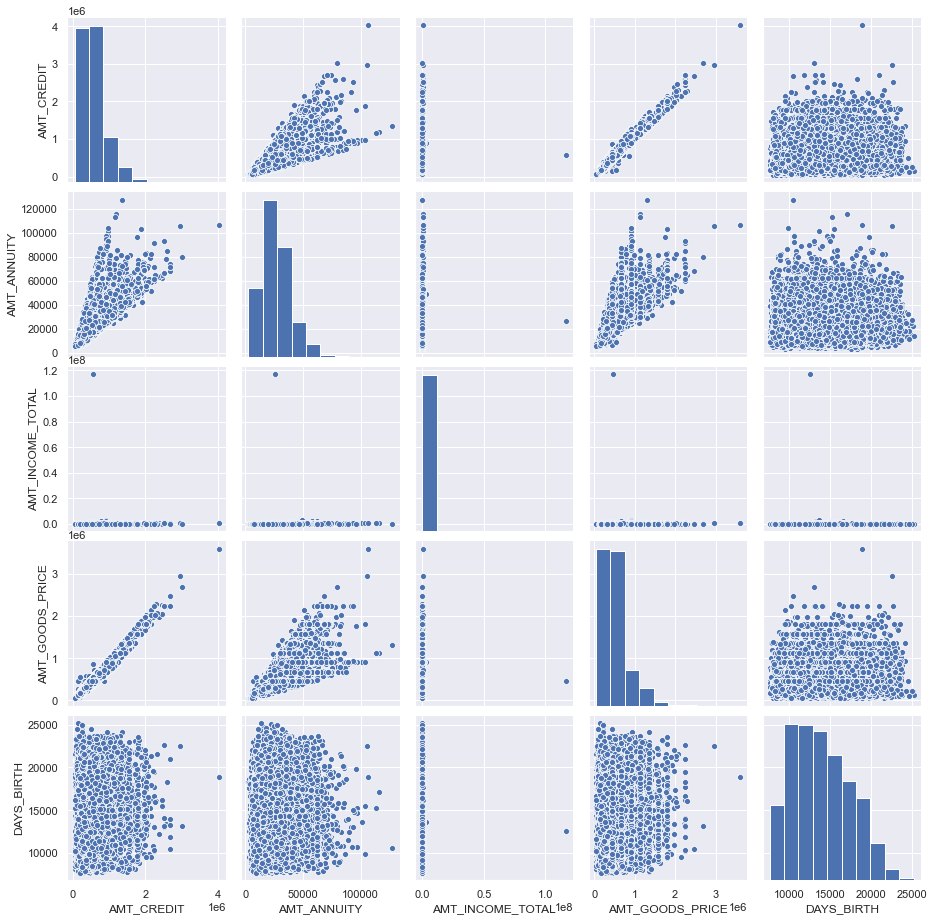

In [197]:
#Pairplot for Newapplication_1 (Loan-Payment Difficulties)
pair = Newapplication_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()


In [198]:
from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
from plotly import tools
import plotly.express as px
from scipy.stats import boxcox


In [199]:
# Heatmap for Loan- Non-Defaulters
Newapplication_0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method = 'pearson').iplot(kind="box",title="Correlation Heatmap for Non-Defaulters",colorscale ="purples")

In [200]:
# Correlation Heatmap for Loan-Defaulters
Newapplication_1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method = 'pearson').iplot(kind='box',title="Correlation Heatmap for Defaulters",colorscale="purples")

In [222]:
#for Target=0
corr=Newapplication_0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
1268,AGE_YEARS,DAYS_BIRTH,0.999591,0.999591
960,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998492,0.998492
220,AMT_GOODS_PRICE,AMT_CREDIT,0.986471,0.986471
517,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.949504,0.949504
434,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893275,0.893275
997,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.861492,0.861492
665,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.860421,0.860421
776,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.820828,0.820828
221,AMT_GOODS_PRICE,AMT_ANNUITY,0.766655,0.766655
184,AMT_ANNUITY,AMT_CREDIT,0.762103,0.762103


In [223]:
#for Target=1
corr=Newapplication_1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
1268,AGE_YEARS,DAYS_BIRTH,0.999565,0.999565
960,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998289,0.998289
220,AMT_GOODS_PRICE,AMT_CREDIT,0.982464,0.982464
517,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956531,0.956531
434,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893829,0.893829
997,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.867983,0.867983
665,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.846872,0.846872
776,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.768247,0.768247
221,AMT_GOODS_PRICE,AMT_ANNUITY,0.748940,0.748940
184,AMT_ANNUITY,AMT_CREDIT,0.748708,0.748708


##### ** We observe that there is a high correlation between credit amount and goods price. 

##### ** We can observe that there is some deviancies in the correlation of Defaulters and Loan- Non-Defaulters such as credit amount v/s income.




### 5. Univariate Analysis on Previous Data Set

##### 5.1 Univariate Analysis on categorical column

 Contract Status

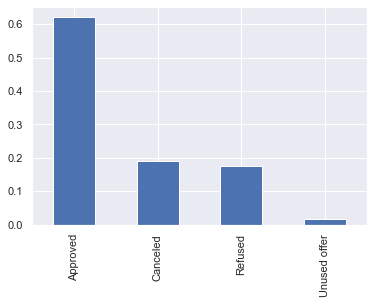

In [202]:
(application_previous.NAME_CONTRACT_STATUS.value_counts()/len(application_previous)).plot.bar()
plt.show()


#### We can observe that majority of loans are approved and very less percentage of loans are unused offer

Payment Method

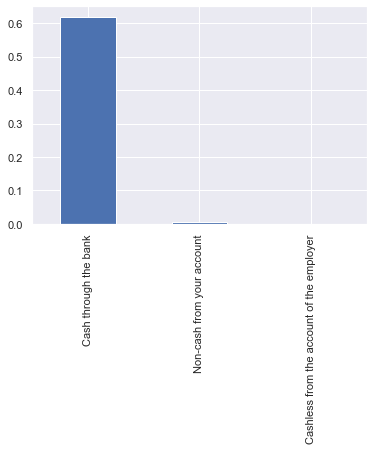

In [203]:
(application_previous.NAME_PAYMENT_TYPE.value_counts()/len(application_previous)).plot.bar()
plt.show()



##### 99% of the clients chose to pay cash through bank.



 Client Type


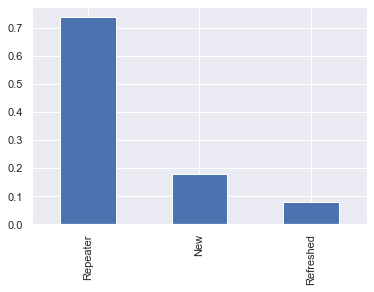

In [204]:
(application_previous.NAME_CLIENT_TYPE.value_counts()/len(application_previous)).plot.bar()
plt.show()


##### We can Observe that the majority of the clients are repeters.

 Day of the week


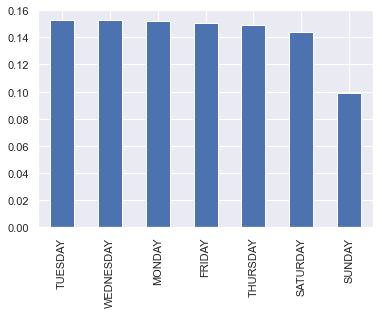

In [205]:
(application_previous.WEEKDAY_APPR_PROCESS_START.value_counts()/len(application_previous)).plot.bar()
plt.show()


##### There are less number of applicants that come in the weekends.


Was the previous application for CASH, POS, CAR, CARDS


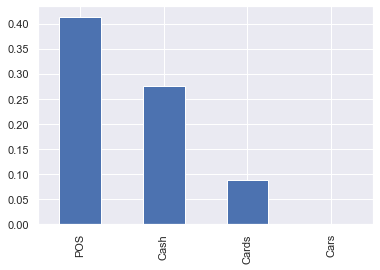

In [206]:
(application_previous.NAME_PORTFOLIO.value_counts()/len(application_previous)).plot.bar()
plt.show()

#### Here the majority of previous application is for POS and a good amount of it is for cash.



#### 5.2   Bivariate analysis on numerical columns

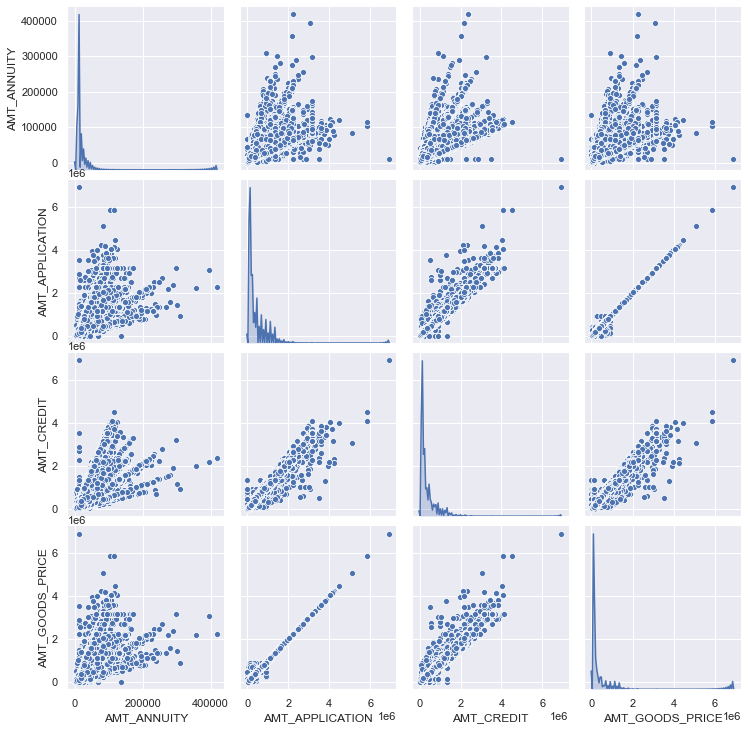

In [207]:
#using pairplot for analysis on numeric vriables

sns.pairplot(application_previous[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], palette="Set2", diag_kind="kde", height=2.5)
plt.show()


*Column CNT_Payment ideally should have had a high correlation with AMT_credit, ie higher credit, more the term of 
loan. But no such correaltion can be seen.
*AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION - as expected have high correlation. Higher the value of good purchased more there will be need of loan and surely all these will correlate.
*AMT_Credit to AMT_GOOD_PRICE also the correlation is high.


#### 6. Merging the New Data Set (application_new) and Previous Data Set (application_previous)

In [208]:
application_previous.shape

(1670214, 25)

In [209]:
#Merging the Application dataset with previous appliaction dataset
Merged_data = pd.merge(left=application_previous,right=application_new,how='inner',on='SK_ID_CURR',suffixes='_x')
Merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_,AMT_ANNUITY_,AMT_APPLICATION,AMT_CREDIT_,AMT_GOODS_PRICE_,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPEx,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDITx,AMT_ANNUITYx,AMT_GOODS_PRICEx,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income Group,Credit Group,AGE_YEARS,AGE_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,NaN,Approved,73,Cash through the bank,NaN,Repeater,Mobile,POS,NaN,Country-wide,Connectivity,12.0,middle,POS mobile with interest,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443,7392,8447.0,4120,Laborers,3.0,1,1,TUESDAY,17,0,1,1,0,0,0,Military,0.683797,0.510853,3.0,0.0,3.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,0.0,Above Average,Average,39,Middle Aged
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,1800000.0,SATURDAY,18,Y,1,NaN,Refused,472,Cash through the bank,SCO,Repeater,Clothing and Accessories,POS,NaN,Regional / Local,Furniture,36.0,low_normal,POS industry with interest,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443,7392,8447.0,4120,Laborers,3.0,1,1,TUESDAY,17,0,1,1,0,0,0,Military,0.683797,0.510853,3.0,0.0,3.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,0.0,Above Average,Average,39,Middle Aged
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,108400.5,SUNDAY,14,Y,1,NaN,Approved,548,Cash through the bank,NaN,New,Furniture,POS,NaN,Stone,Furniture,12.0,middle,POS industry with interest,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443,7392,8447.0,4120,Laborers,3.0,1,1,TUESDAY,17,0,1,1,0,0,0,Military,0.683797,0.510853,3.0,0.0,3.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,0.0,Above Average,Average,39,Middle Aged
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,NaN,Approved,164,NaN,NaN,Repeater,NaN,Cash,x-sell,Contact center,NaN,36.0,low_action,Cash X-Sell: low,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,21335,1255,5455.0,4263,Private service staff,2.0,2,2,SUNDAY,10,0,0,0,0,0,0,Self-employed,0.663524,0.510853,0.0,0.0,0.0,0.0,517.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Low,58,Seniors
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,450000.0,WEDNESDAY,9,Y,1,NaN,Approved,515,NaN,NaN,Repeater,NaN,Cash,x-sell,AP+ (Cash loan),NaN,36.0,low_normal,Cash X-Sell: low,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,21335,1255,5455.0,4263,Private service staff,2.0,2,2,SUNDAY,10,0,0,0,0,0,0,Self-employed,0.663524,0.510853,0.0,0.0,0.0,0.0,517.0,0.

In [210]:
Merged_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE_', 'AMT_ANNUITY_',
       'AMT_APPLICATION', 'AMT_CREDIT_', 'AMT_GOODS_PRICE_',
       'WEEKDAY_APPR_PROCESS_START_', 'HOUR_APPR_PROCESS_START_',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'TARGET',
       'NAME_CONTRACT_TYPEx', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDITx', 'AMT_ANNUITYx',
       'AMT_GOODS_PRICEx', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PU

In [211]:
# Renaming the column
Merged_data = Merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [212]:
Merged_data.shape


(1140118, 75)

##### 6.1 Performing univariate analysis

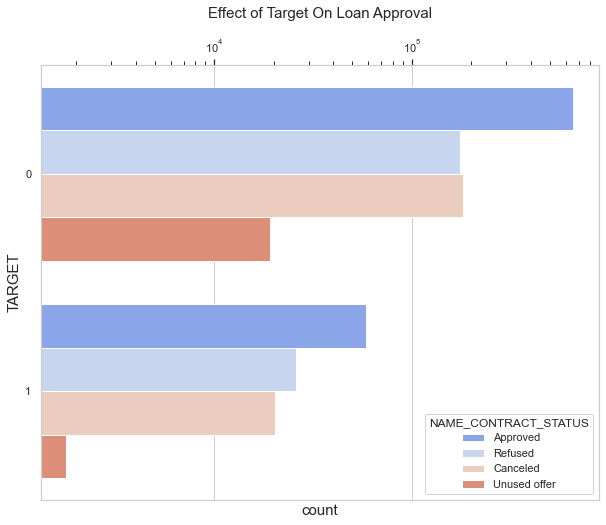

In [213]:
# Distribution of Contract Status with Target

sns.set_style('whitegrid')
sns.set_context('notebook')

plt.figure(figsize=(10,8))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 20
plt.title('Effect of Target On Loan Approval')
plt.xscale('log')

ax = sns.countplot(data = Merged_data, y= 'TARGET',orient="h",
                   order=Merged_data['TARGET'].value_counts().index,hue= 'NAME_CONTRACT_STATUS',palette='coolwarm') 
ax.xaxis.tick_top()


##### Target variable (0 - Non Defaulter 1 - Defaulter )

#### Loans which were previously refused or cancelled have a higher default rate.

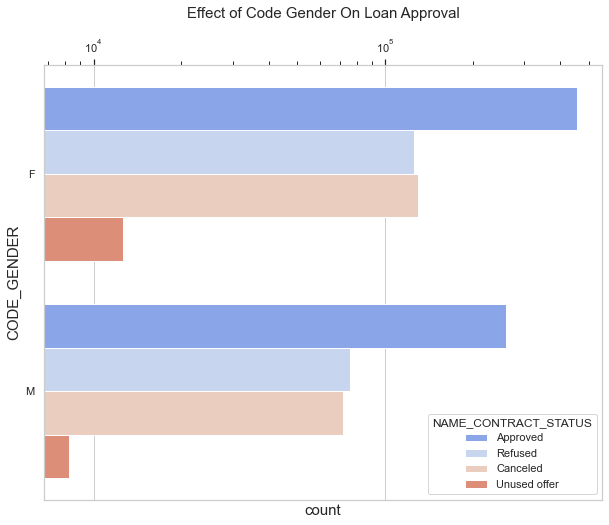

In [214]:
# Effect of Code Gender on Loan Approval

sns.set_style('whitegrid')
sns.set_context('notebook')

plt.figure(figsize=(10,8))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 20
plt.title('Effect of Code Gender On Loan Approval')
plt.xscale('log')

ax = sns.countplot(data = Merged_data, y= 'CODE_GENDER',orient="h",
                   order=Merged_data['CODE_GENDER'].value_counts().index,hue= 'NAME_CONTRACT_STATUS',palette='coolwarm') 
ax.xaxis.tick_top()


##### As per above plot, We can see that code gender doesn't have any effect on application approval or rejection.



#### 6.2 Performing bivariate analysis on merged data set



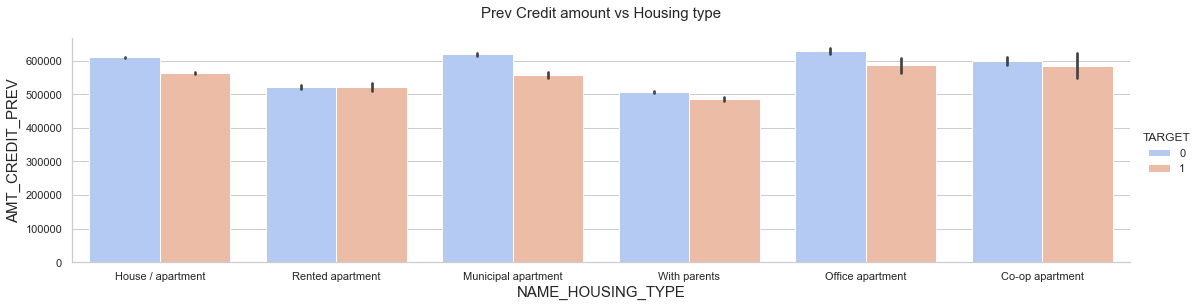

In [215]:
#Plotting AMT_CREDIT_PREV (Credit amount prev) vs NAME_HOUSING_TYPE (Housing type) 

sns.catplot(x="NAME_HOUSING_TYPE", y="AMT_CREDIT_PREV", hue="TARGET", data=Merged_data,palette='coolwarm',kind="bar",height=4,aspect=4)
plt.title('Prev Credit amount vs Housing type')
plt.show()



##### Here we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.



### CONCLUSION

EDA for Banking Data Sets revealed that:

- The Bank lends more to females.

- The Proportion of defaulters is 9%.

- Proportion of working defaults more and state servants less.

- Banks should be less focused on income type ‘Working’ as they are having large number of unsuccessful payments.

- Higher amount loans , Higher Income Less Defaults.

- Banks should be more focused on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

- Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.

- ‘Repair’ is having higher number of unsuccessful payments on time with loan purpose.

- Loans previously refused/cancelled - Higher the Default Rate.


